# Lab 2. Convolutional Neural Networks (CNN)

### Import packages

In [4]:
from src.cnn import CNN
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
import tensorflow as tf

## Exploratory Analysis

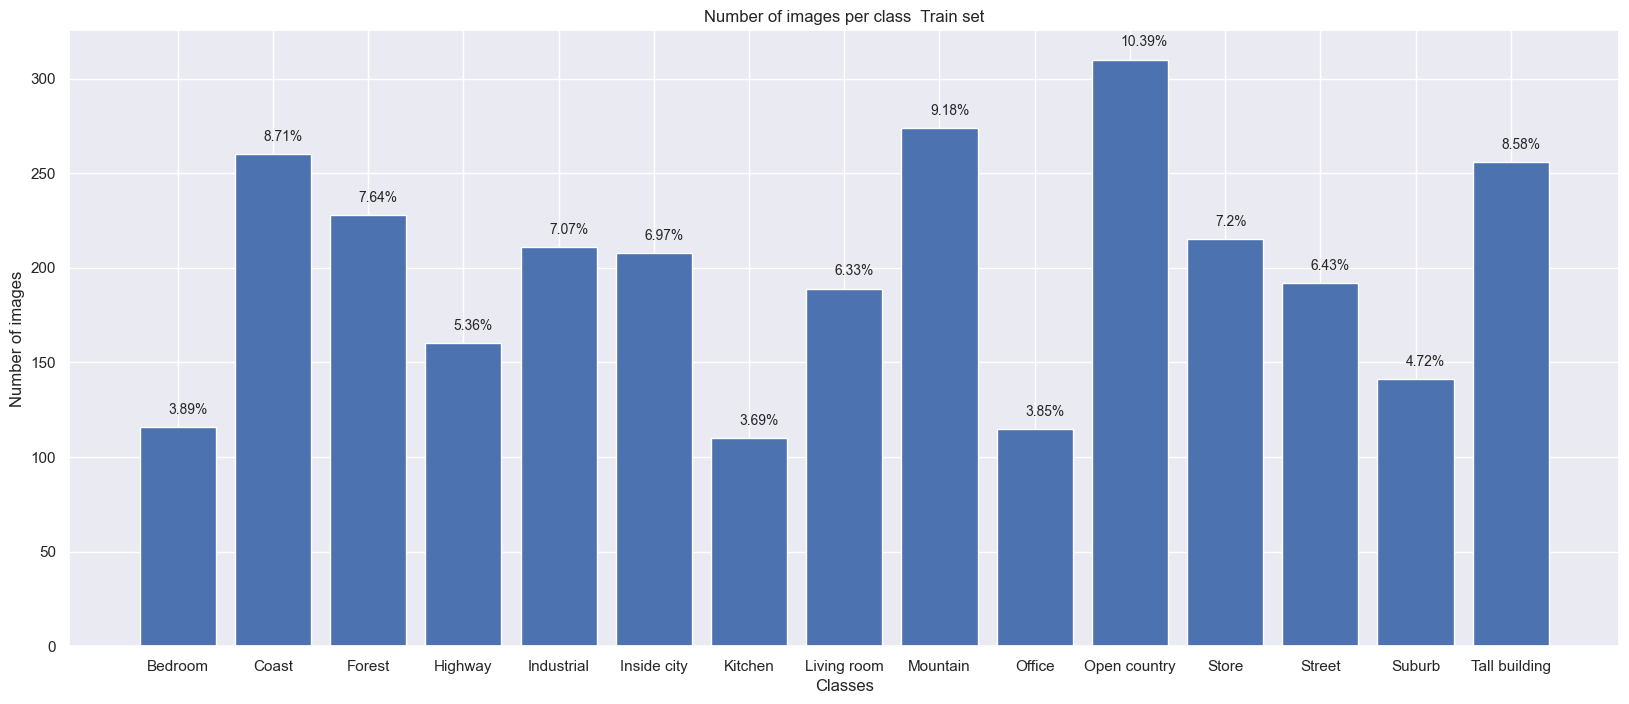

In [3]:
#bar plot of classes x axis and lista y axis
classes=os.listdir('./src/dataset/training')
n_images_class=[]
sns.set()
for class_ in classes:
    path=os.path.join('./src/dataset/training',class_)
    n_images_class.append(len(os.listdir(path)))
plt.figure(figsize=(20,8))
plt.bar(classes,n_images_class)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class  Train set')
#add the % to the top of the bar
for i in range(len(n_images_class)):
    plt.text(x=i-0.1 , y = n_images_class[i]+7, s=str(round(n_images_class[i]/sum(n_images_class)*100,2))+'%', size=10)    
plt.show()

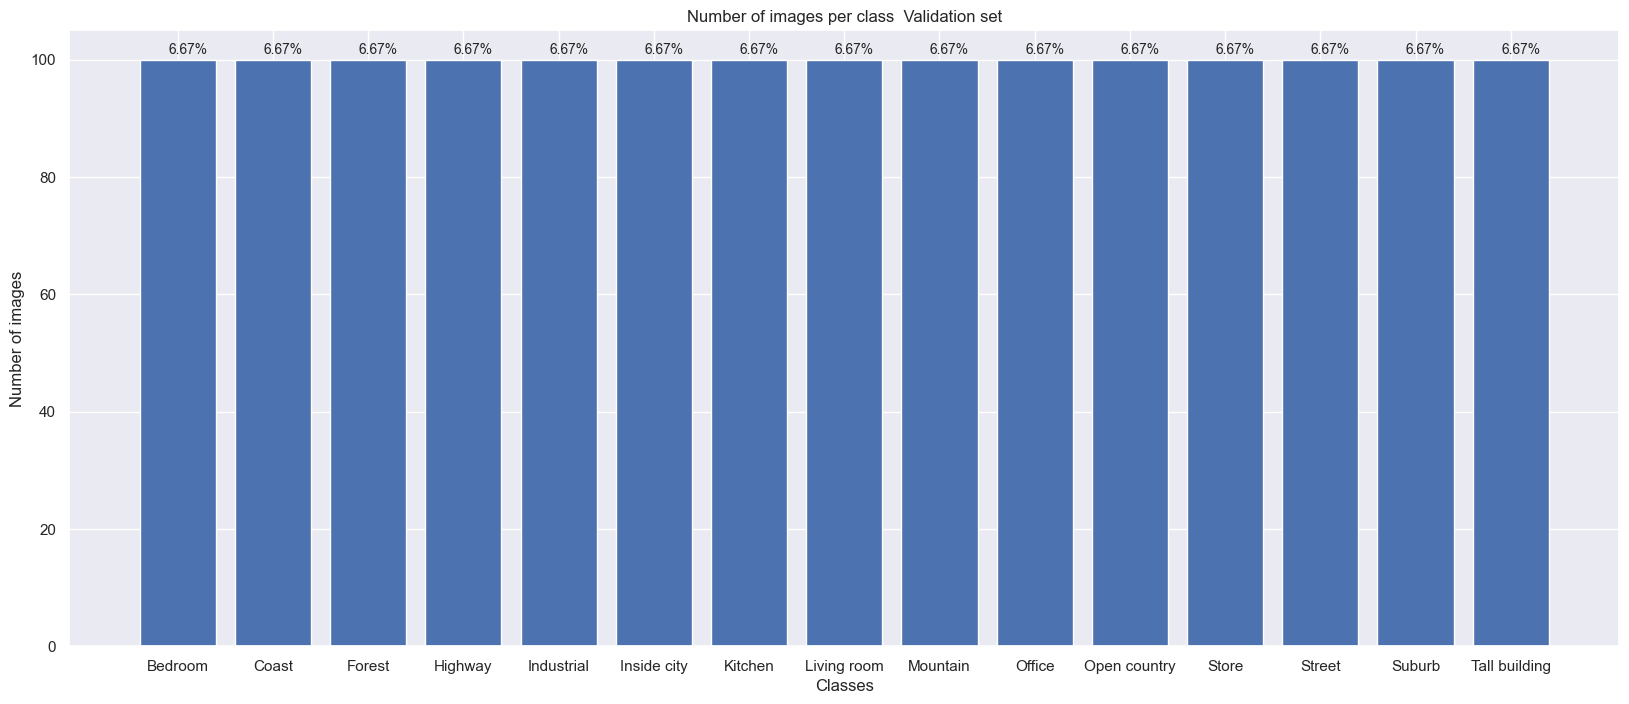

In [4]:
#bar plot of classes x axis and lista y axis
classes=os.listdir('./src/dataset/validation')
n_images_class=[]
sns.set()
for class_ in classes:
    path=os.path.join('./src/dataset/validation',class_)
    n_images_class.append(len(os.listdir(path)))
plt.figure(figsize=(20,8))
plt.bar(classes,n_images_class)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class  Validation set')
#add the % to the top of the bar
for i in range(len(n_images_class)):
    plt.text(x=i-0.1 , y = n_images_class[i]+1, s=str(round(n_images_class[i]/sum(n_images_class)*100,2))+'%', size=10)    
plt.show()

### Global variables

In [6]:
training_dir = './src/dataset/training'
validation_dir = './src/dataset/validation'

cnn = CNN(base_model='ResNet50',model_name='resnet50_1')

In [4]:
cnn.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.15))
cnn.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.15))
cnn.add(tf.keras.layers.Dense(15, activation='softmax'))

### Train



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                            

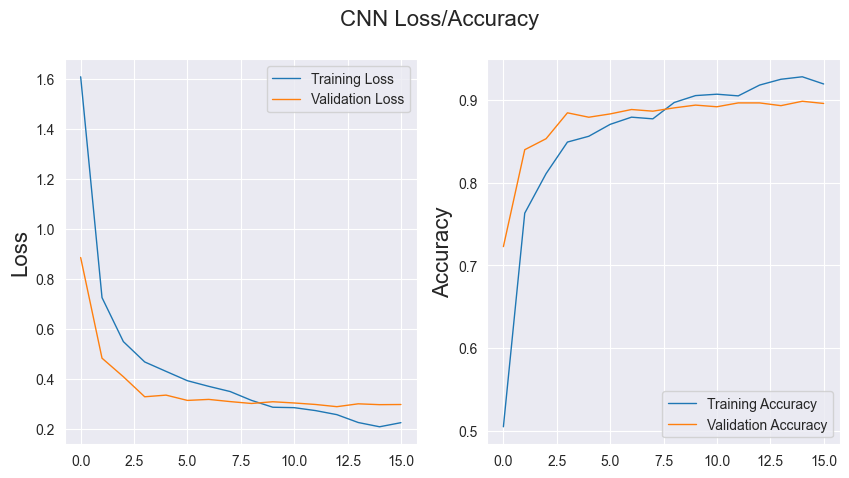

In [5]:
cnn.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn.save()

N/N representa la particion de las imagenes entre la particion en lotes.

### Predict

#### Training set

In [6]:
cnn.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 46s 15ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            112.0    0.0     0.0      0.0         0.0          0.0      1.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  255.0     1.0      0.0         1.0          0.0      0.0          0.0       1.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   223.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           3.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    155.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0        

#### Validation set

In [7]:
cnn.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 23s 15ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             90.0    0.0     0.0      0.0         0.0          1.0      1.0          7.0       0.0     0.0           0.0    0.0     0.0     1.0            0.0
Coast                0.0   92.0     0.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    98.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           1.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     94.0         0.0          1.0      0.0          0.0       0.0     0.0           1.0    0.0     4.0     0.0      

si cogemos muchos lotes porvoca que ehay muchas oscilanciones. Si se utiliza todo va muy lento.

Una forma de aumentar el numero de ejemplos es hacer una generación modificando

train 0.91, val 0.88133

 train   val 0.91



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_6 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                          

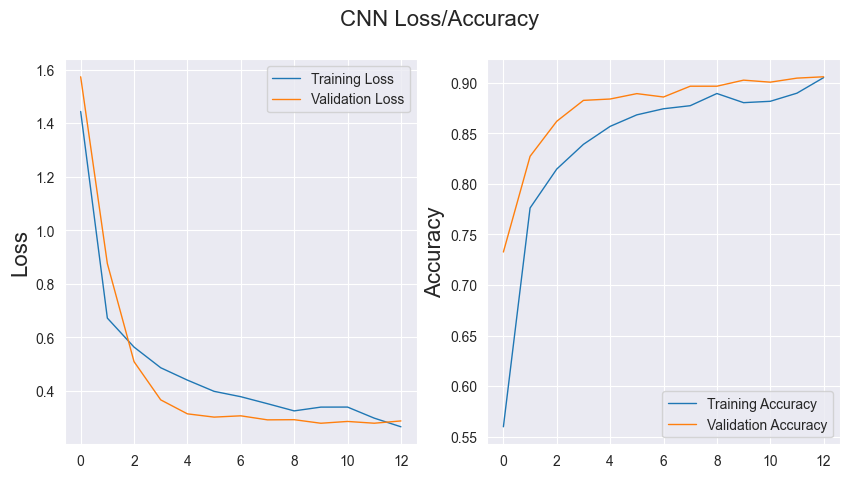

In [8]:
cnn_2 = CNN(base_model='Xception',model_name='xception_1')

cnn_2.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_2.add(tf.keras.layers.BatchNormalization())
cnn_2.add(tf.keras.layers.Dropout(0.15))
cnn_2.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_2.add(tf.keras.layers.BatchNormalization())
cnn_2.add(tf.keras.layers.Dropout(0.15))
cnn_2.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_2.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_2.save()


In [9]:
cnn_2.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 35s 11ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          2.0       0.0     1.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  249.0     1.0      1.0         1.0          0.0      0.0          0.0       0.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    2.0   209.0      0.0         1.0          0.0      0.0          0.0       5.0     0.0          10.0    0.0     0.0     0.0            1.0
Highway              0.0    0.0     0.0    153.0         1.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     5.0     0.0        

In [10]:
cnn_2.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 17s 12ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             91.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     2.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   92.0     0.0      0.0         2.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    88.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     93.0         0.0          0.0      0.0          0.0       1.0     0.0           2.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                          

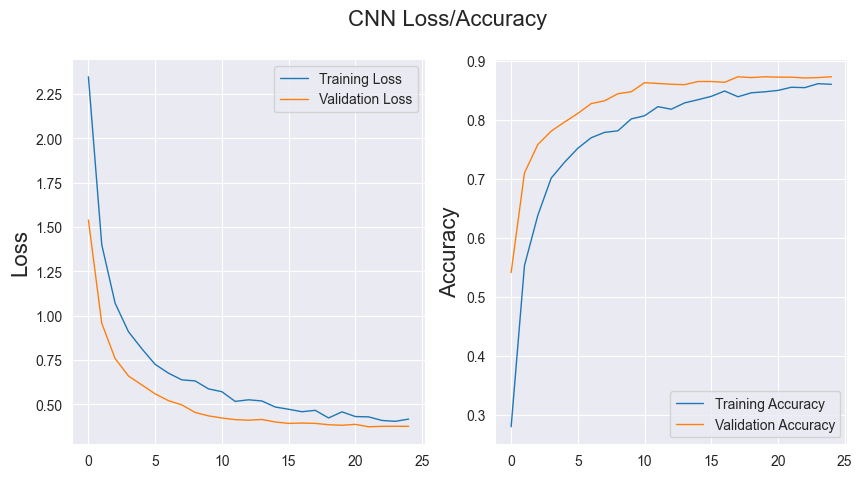

In [11]:
cnn_3 = CNN(base_model='VGG19',model_name='vgg19_1')

cnn_3.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_3.add(tf.keras.layers.BatchNormalization())
cnn_3.add(tf.keras.layers.Dropout(0.15))
cnn_3.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_3.add(tf.keras.layers.BatchNormalization())
cnn_3.add(tf.keras.layers.Dropout(0.15))
cnn_3.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_3.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_3.save()

In [12]:
cnn_3.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 31s 10ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      0.0          5.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  244.0     1.0      3.0         0.0          0.0      0.0          0.0       1.0     0.0          11.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   211.0      0.0         0.0          0.0      0.0          0.0       8.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0    152.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    1.0     4.0     0.0        

In [14]:
cnn_3.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 66s 44ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             83.0    0.0     0.0      0.0         0.0          0.0      2.0         14.0       0.0     0.0           0.0    0.0     1.0     0.0            0.0
Coast                0.0   97.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    93.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           4.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 batch_normalization_10 (Bat  (None, 1920)             7680      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 1920)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               983552    
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                         

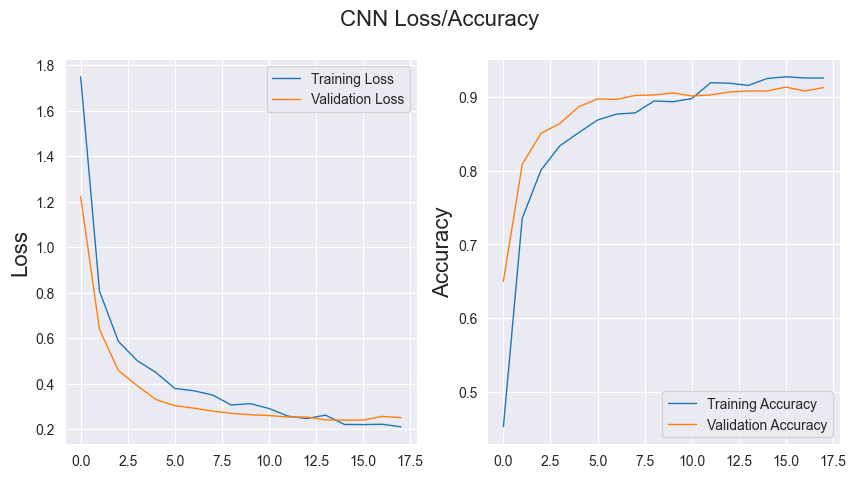

In [15]:
cnn_4 = CNN(base_model='DenseNet201', model_name='DenseNet201_1')

cnn_4.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_4.add(tf.keras.layers.BatchNormalization())
cnn_4.add(tf.keras.layers.Dropout(0.15))
cnn_4.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_4.add(tf.keras.layers.BatchNormalization())
cnn_4.add(tf.keras.layers.Dropout(0.15))
cnn_4.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_4.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_4.save()

In [16]:
cnn_4.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 115s 38ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      2.0          0.0       0.0     1.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  242.0     1.0      0.0         1.0          0.0      0.0          0.0       1.0     0.0          15.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   219.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    153.0         3.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     2.0     0.0       

In [17]:
cnn_4.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 58s 38ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             84.0    0.0     0.0      0.0         0.0          0.0      4.0         11.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   91.0     1.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    91.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           7.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     93.0         0.0          1.0      0.0          0.0       1.0     0.0           2.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 batch_normalization_12 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                         

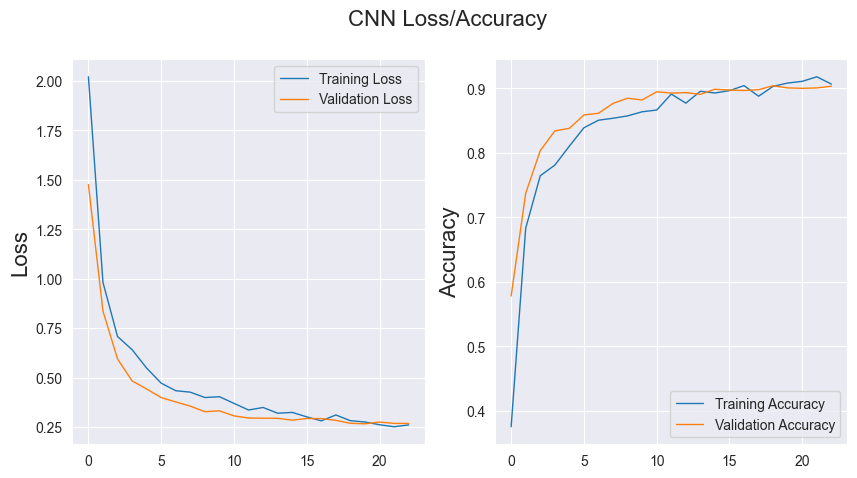

In [18]:
cnn_5 = CNN(base_model='DenseNet121', model_name='DenseNet121_1')

cnn_5.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_5.add(tf.keras.layers.BatchNormalization())
cnn_5.add(tf.keras.layers.Dropout(0.15))
cnn_5.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_5.add(tf.keras.layers.BatchNormalization())
cnn_5.add(tf.keras.layers.Dropout(0.15))
cnn_5.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_5.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_5.save()

In [19]:
cnn_5.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 71s 23ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  249.0     1.0      1.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   202.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0          23.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0    153.0         2.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0        

In [20]:
cnn_5.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 34s 23ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             84.0    0.0     0.0      0.0         0.0          0.0      2.0         14.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   95.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    87.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     95.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     4.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1664)              12642880  
                                                                 
 batch_normalization_14 (Bat  (None, 1664)             6656      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 1664)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               852480    
                                                                 
 batch_normalization_15 (Bat  (None, 512)              2048      
 chNormalization)                         

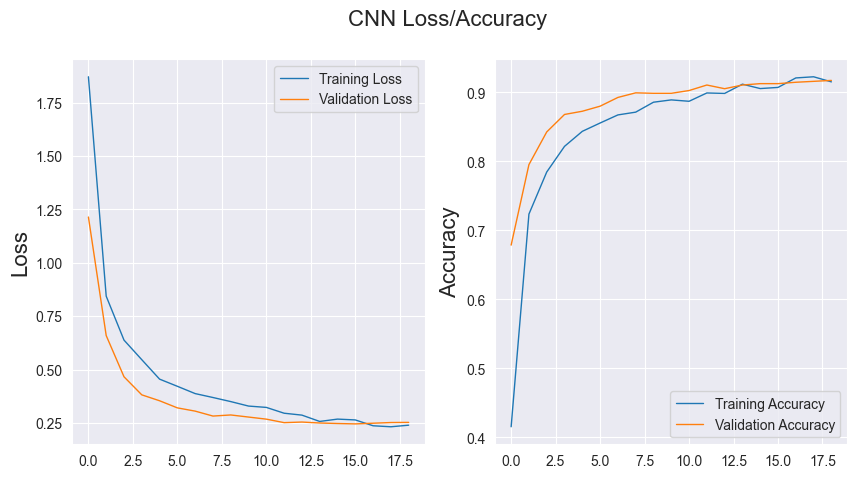

In [21]:
# CNN with 'DenseNet169', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', ""'NASNetLarge', 'NASNetMobile', 'VGG16'

cnn_6 = CNN(base_model='DenseNet169', model_name='DenseNet169_1')

cnn_6.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_6.add(tf.keras.layers.BatchNormalization())
cnn_6.add(tf.keras.layers.Dropout(0.15))
cnn_6.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_6.add(tf.keras.layers.BatchNormalization())
cnn_6.add(tf.keras.layers.Dropout(0.15))
cnn_6.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_6.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_6.save()

In [22]:
cnn_6.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 90s 29ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            112.0    0.0     0.0      0.0         0.0          0.0      0.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  254.0     1.0      1.0         0.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   216.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    156.0         1.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     0.0        

In [23]:
cnn_6.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 44s 29ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             83.0    0.0     0.0      0.0         0.0          0.0      3.0         12.0       0.0     0.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   95.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    96.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     97.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_219 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 1536)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               786944    
                                                                 
 batch_normalization_220 (Ba  (None, 512) 

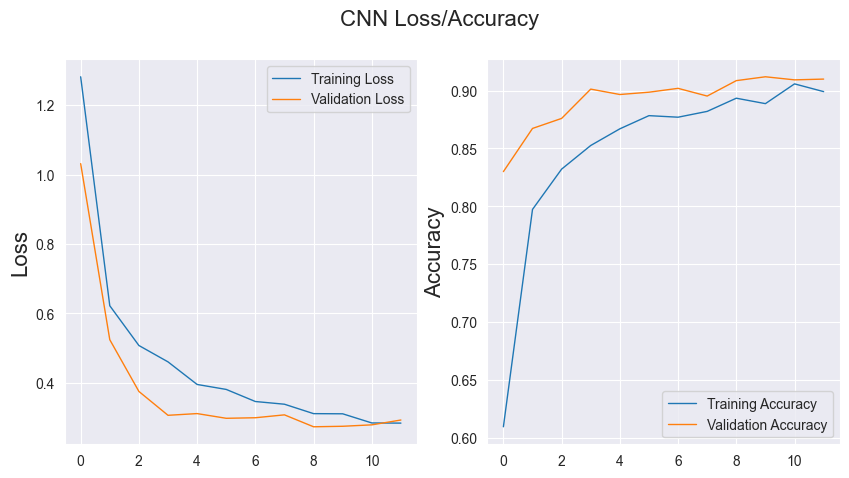

In [24]:
cnn_7 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_1')

cnn_7.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_7.add(tf.keras.layers.BatchNormalization())
cnn_7.add(tf.keras.layers.Dropout(0.15))
cnn_7.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_7.add(tf.keras.layers.BatchNormalization())
cnn_7.add(tf.keras.layers.Dropout(0.15))
cnn_7.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_7.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_7.save()


In [25]:
cnn_7.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 130s 43ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      0.0          5.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  250.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           8.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   212.0      0.0         1.0          0.0      0.0          0.0       5.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    149.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     9.0     0.0       

In [26]:
cnn_7.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 64s 43ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             88.0    0.0     0.0      0.0         0.0          0.0      0.0         12.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   94.0     0.0      2.0         0.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    89.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           6.0    1.0     0.0     2.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 batch_normalization_315 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_316 (Ba  (None, 512)              2048      
 tchNormalization)                        

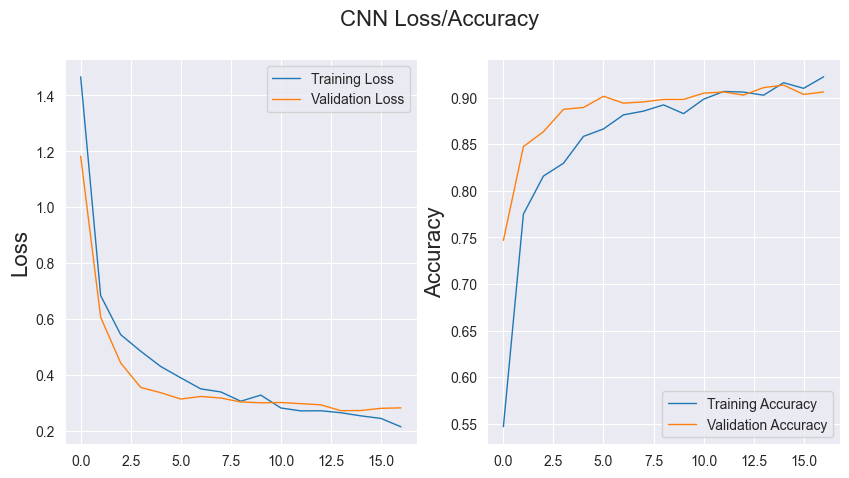

In [27]:
cnn_8 = CNN(base_model='InceptionV3', model_name='InceptionV3_1')

cnn_8.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_8.add(tf.keras.layers.BatchNormalization())
cnn_8.add(tf.keras.layers.Dropout(0.15))
cnn_8.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_8.add(tf.keras.layers.BatchNormalization())
cnn_8.add(tf.keras.layers.Dropout(0.15))
cnn_8.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_8.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_8.save()

In [28]:
cnn_8.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 64s 21ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            109.0    0.0     0.0      0.0         0.0          0.0      2.0          4.0       0.0     1.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  244.0     1.0      3.0         1.0          0.0      0.0          0.0       0.0     0.0          10.0    1.0     0.0     0.0            0.0
Forest               0.0    0.0   215.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0          12.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    156.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0        

In [29]:
cnn_8.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 32s 21ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             83.0    0.0     0.0      0.0         0.0          0.0      0.0         17.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   92.0     0.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            2.0
Forest               0.0    0.0    89.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     95.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_317 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_318 (Ba  (None, 512) 

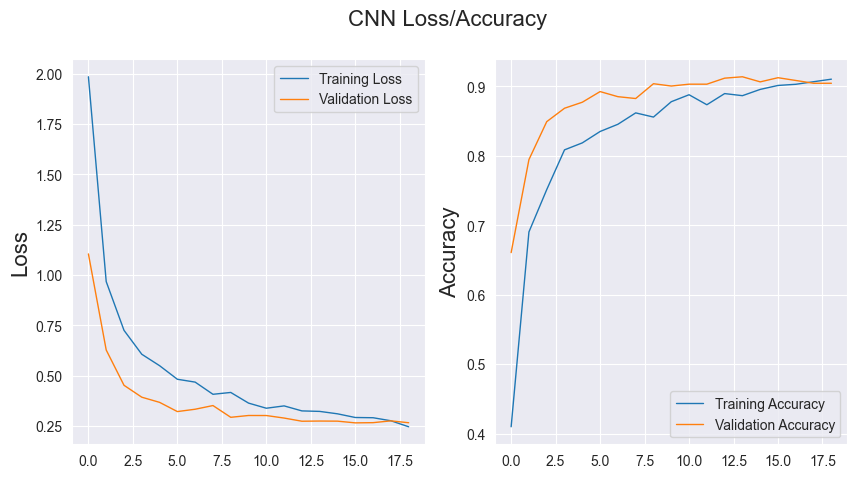

In [30]:
cnn_9 = CNN(base_model='MobileNet', model_name='MobileNet_1')

cnn_9.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_9.add(tf.keras.layers.BatchNormalization())
cnn_9.add(tf.keras.layers.Dropout(0.15))
cnn_9.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_9.add(tf.keras.layers.BatchNormalization())
cnn_9.add(tf.keras.layers.Dropout(0.15))
cnn_9.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_9.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_9.save()

In [31]:
cnn_9.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            109.0    0.0     0.0      0.0         0.0          0.0      2.0          5.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  248.0     1.0      1.0         0.0          0.0      0.0          0.0       1.0     0.0           9.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   220.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    0.0     1.0     0.0            0.0
Highway              0.0    0.0     0.0    156.0         2.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     1.0     0.0         

In [32]:
cnn_9.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             75.0    0.0     0.0      0.0         0.0          0.0      4.0         21.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   98.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    93.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           5.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          1.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 batch_normalization_319 (Ba  (None, 1280)             5120      
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 1280)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               655872    
                                                                 
 batch_normalization_320 (Ba  (None, 512) 

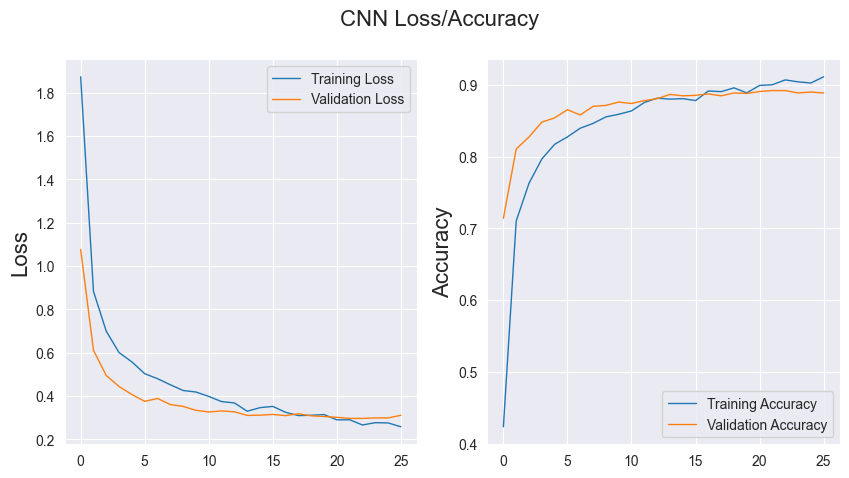

In [33]:
cnn_10 = CNN(base_model='MobileNetV2', model_name='MobileNetV2_1')

cnn_10.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_10.add(tf.keras.layers.BatchNormalization())
cnn_10.add(tf.keras.layers.Dropout(0.15))
cnn_10.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_10.add(tf.keras.layers.BatchNormalization())
cnn_10.add(tf.keras.layers.Dropout(0.15))

cnn_10.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_10.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)

cnn_10.save()

In [34]:
cnn_10.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 32s 11ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      1.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  245.0     1.0      0.0         3.0          0.0      0.0          0.0       0.0     0.0          11.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0   219.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           7.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    154.0         2.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0        

In [35]:
cnn_10.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 16s 11ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             81.0    0.0     1.0      0.0         0.0          0.0      2.0         15.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   89.0     2.0      0.0         2.0          0.0      0.0          0.0       1.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    91.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           4.0    1.0     0.0     1.0            0.0
Highway              0.0    1.0     0.0     87.0         2.0          1.0      0.0          0.0       0.0     0.0           2.0    0.0     7.0     0.0      

In [46]:
cnn_11 = CNN(base_model='NASNetLarge')

cnn_11.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_11.add(tf.keras.layers.BatchNormalization())
cnn_11.add(tf.keras.layers.Dropout(0.15))
cnn_11.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_11.add(tf.keras.layers.BatchNormalization())
cnn_11.add(tf.keras.layers.Dropout(0.15))
cnn_11.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_11.train(training_dir, validation_dir, epochs=50)
cnn_11.save('NASNetLarge-50epoch')

cnn_11.load('NASNetLarge-50epoch')

343610240/343610240 [==============================] - 18s 0us/step


Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 4032)              84916818  
                                                                 
 batch_normalization_325 (Ba  (None, 4032)             16128     
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 4032)              0         
                                                                 
 dense_37 (Dense)            (None, 512)               2064896   
                                                                 
 batch_normalization_326 (Ba  (None, 51

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_12/NASNet/separable_conv_1_pad_reduction_right2_stem_1/Pad' defined at (most recent call last):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Diego\AppData\Local\Temp\ipykernel_10836\570714709.py", line 11, in <module>
      cnn_11.train(training_dir, validation_dir, epochs=50)
    File "c:\Users\Diego\CACHARREANDOPY\ICAI\ML2\DeepLearning\practica_final\ml2-deep-learning\src\cnn.py", line 142, in train
      history = self._model.fit(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\reshaping\zero_padding2d.py", line 149, in call
      return backend.spatial_2d_padding(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\backend.py", line 4031, in spatial_2d_padding
      return tf.compat.v1.pad(x, pattern)
Node: 'sequential_12/NASNet/separable_conv_1_pad_reduction_right2_stem_1/Pad'
OOM when allocating tensor with shape[32,171,171,96] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_12/NASNet/separable_conv_1_pad_reduction_right2_stem_1/Pad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1044887]

In [36]:
cnn_11.predict(training_dir, "Training")

NameError: name 'cnn_11' is not defined

In [ ]:
cnn_11.predict(validation_dir, "Validation")



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 1056)              4269716   
                                                                 
 batch_normalization_321 (Ba  (None, 1056)             4224      
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 1056)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               541184    
                                                                 
 batch_normalization_322 (Ba  (None, 512)              2048      
 tchNormalization)                       

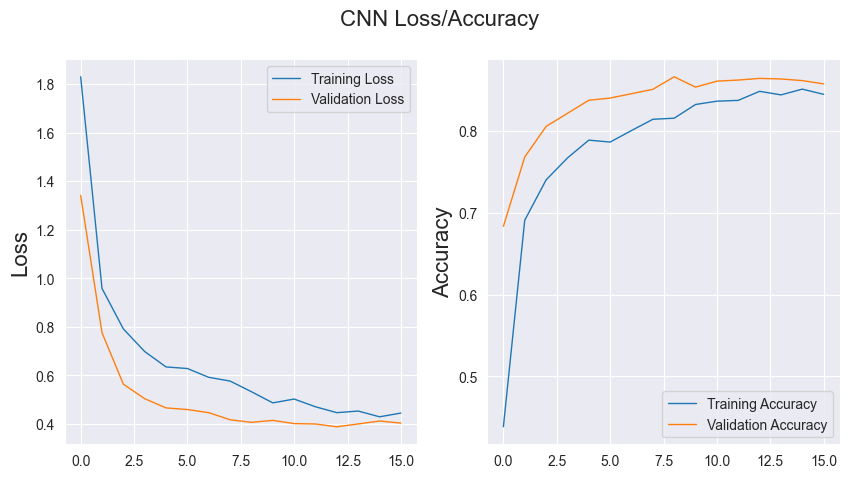

In [37]:
cnn_12 = CNN(base_model='NASNetMobile', model_name='NASNetMobile_1')

cnn_12.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_12.add(tf.keras.layers.BatchNormalization())
cnn_12.add(tf.keras.layers.Dropout(0.15))
cnn_12.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_12.add(tf.keras.layers.BatchNormalization())
cnn_12.add(tf.keras.layers.Dropout(0.15))
cnn_12.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_12.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_12.save()

In [38]:
cnn_12.predict(training_dir, "Training")



Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 144s 47ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            106.0    0.0     0.0      0.0         0.0          0.0      2.0          8.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  242.0     1.0      1.0         3.0          0.0      0.0          0.0       1.0     0.0          11.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   189.0      0.0         0.0          0.0      0.0          0.0       6.0     0.0          32.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0    150.0         2.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     6.0     0.0       

In [39]:
cnn_12.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 72s 48ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             81.0    0.0     0.0      0.0         0.0          0.0      2.0         15.0       0.0     1.0           0.0    0.0     0.0     0.0            1.0
Coast                0.0   91.0     1.0      2.0         0.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    83.0      0.0         0.0          0.0      0.0          0.0       5.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     92.0         0.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     2.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_323 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_324 (Ba  (None, 512)

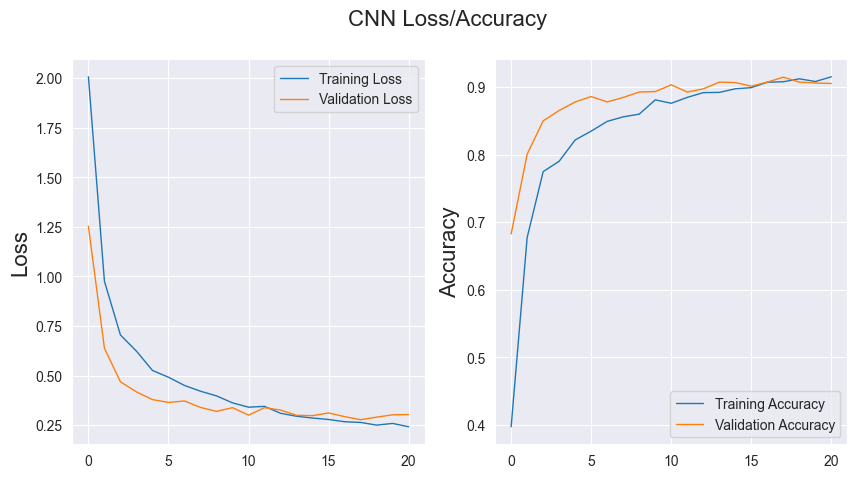

In [40]:
cnn_13 = CNN(base_model='MobileNet', model_name='MobileNet_2')

cnn_13.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_13.add(tf.keras.layers.BatchNormalization())
cnn_13.add(tf.keras.layers.Dropout(0.1))
cnn_13.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_13.add(tf.keras.layers.BatchNormalization())
cnn_13.add(tf.keras.layers.Dropout(0.1))
cnn_13.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_13.add(tf.keras.layers.BatchNormalization())
cnn_13.add(tf.keras.layers.Dropout(0.1))
cnn_13.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_13.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_13.save()

In [41]:
cnn_13.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      1.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  249.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0          10.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   222.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         2.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [42]:
cnn_13.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             84.0    0.0     0.0      0.0         0.0          0.0      4.0          8.0       0.0     0.0           0.0    4.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    93.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           5.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     95.0         0.0          1.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_326 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_327 (Ba  (None, 512)

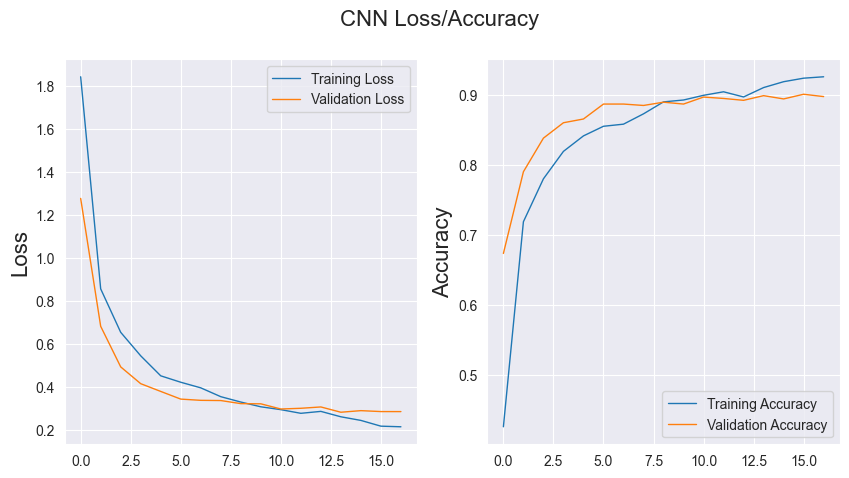

In [43]:
cnn_14 = CNN(base_model='MobileNet', model_name='MobileNet_3')

cnn_14.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_14.add(tf.keras.layers.BatchNormalization())
cnn_14.add(tf.keras.layers.Dropout(0.05))
cnn_14.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_14.add(tf.keras.layers.BatchNormalization())
cnn_14.add(tf.keras.layers.Dropout(0.05))
cnn_14.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_14.add(tf.keras.layers.BatchNormalization())
cnn_14.add(tf.keras.layers.Dropout(0.05))
cnn_14.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_14.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_14.save()

In [44]:
cnn_14.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 20s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            109.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0  253.0     1.0      1.0         0.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   223.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           4.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         1.0          1.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [45]:
cnn_14.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 10s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             77.0    0.0     0.0      0.0         0.0          0.0      2.0         19.0       0.0     0.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    92.0      0.0         1.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     95.0         0.0          1.0      0.0          0.0       0.0     0.0           2.0    0.0     2.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_329 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_330 (Ba  (None, 512)

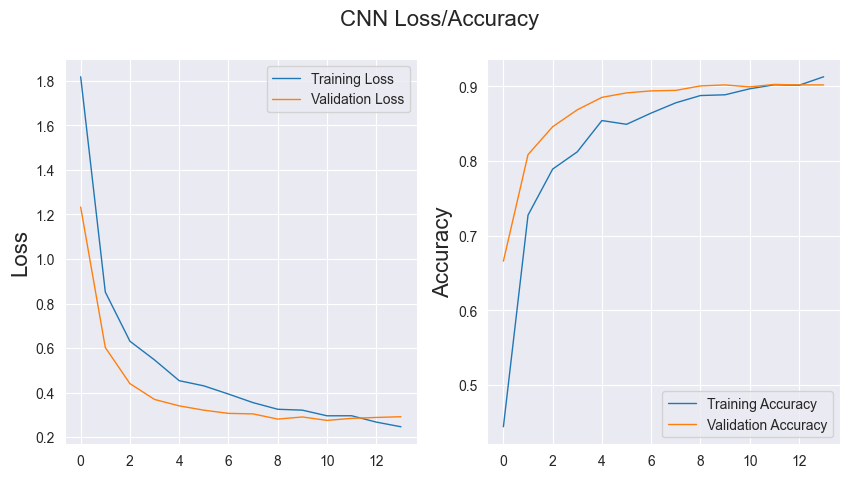

In [46]:


cnn_15 = CNN(base_model='MobileNet', model_name='MobileNet_4')

cnn_15.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn_15.add(tf.keras.layers.BatchNormalization())
cnn_15.add(tf.keras.layers.Dropout(0.05))
cnn_15.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn_15.add(tf.keras.layers.BatchNormalization())
cnn_15.add(tf.keras.layers.Dropout(0.05))
cnn_15.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn_15.add(tf.keras.layers.BatchNormalization())
cnn_15.add(tf.keras.layers.Dropout(0.05))
cnn_15.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_15.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_15.save()

In [47]:
cnn_15.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            107.0    0.0     0.0      0.0         0.0          0.0      1.0          8.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  238.0     1.0      3.0         0.0          0.0      0.0          0.0       3.0     0.0          15.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   215.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    159.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [48]:
cnn_15.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             80.0    0.0     0.0      0.0         0.0          0.0      1.0         19.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   89.0     0.0      1.0         0.0          0.0      0.0          0.0       2.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    88.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           8.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     94.0         1.0          1.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_332 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_31 (Dropout)        (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_333 (Ba  (None, 512)

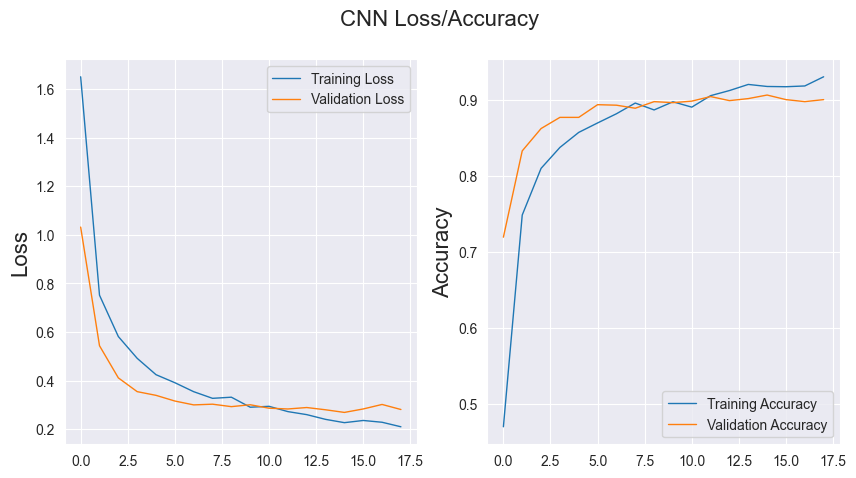

In [49]:

cnn_16 = CNN(base_model='MobileNet', model_name='MobileNet_5')

cnn_16.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
cnn_16.add(tf.keras.layers.BatchNormalization())
cnn_16.add(tf.keras.layers.Dropout(0.05))
cnn_16.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
cnn_16.add(tf.keras.layers.BatchNormalization())
cnn_16.add(tf.keras.layers.Dropout(0.05))
cnn_16.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
cnn_16.add(tf.keras.layers.BatchNormalization())
cnn_16.add(tf.keras.layers.Dropout(0.05))
cnn_16.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_16.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_16.save()

In [50]:
cnn_16.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      1.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  251.0     1.0      1.0         0.0          0.0      0.0          0.0       0.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   211.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0          16.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         1.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     0.0     0.0         

In [51]:
cnn_16.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             82.0    0.0     0.0      0.0         0.0          0.0      4.0         11.0       0.0     1.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    86.0      0.0         1.0          0.0      0.0          0.0       2.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     96.0         0.0          1.0      0.0          0.0       0.0     0.0           0.0    0.0     2.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_335 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_34 (Dropout)        (None, 1024)              0         
                                                                 
 dense_50 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_336 (Ba  (None, 512)

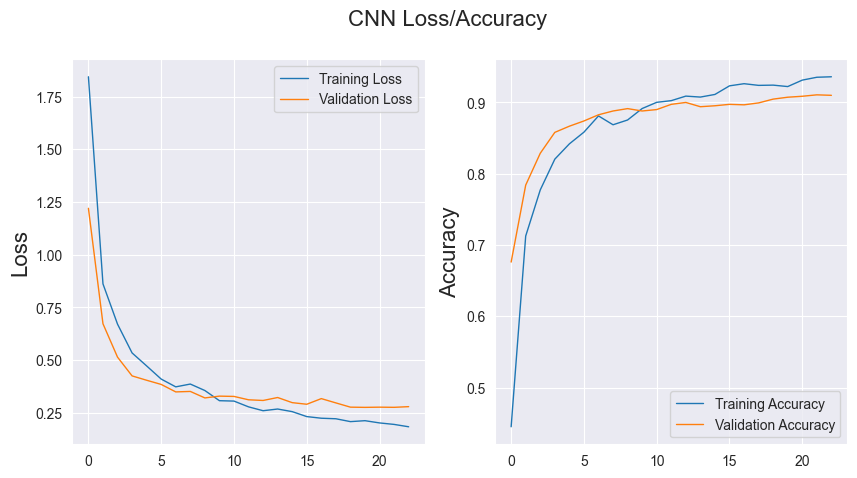

In [52]:

cnn_17 = CNN(base_model='MobileNet', model_name='MobileNet_6')

cnn_17.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_17.add(tf.keras.layers.BatchNormalization())
cnn_17.add(tf.keras.layers.Dropout(0.05))
cnn_17.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_17.add(tf.keras.layers.BatchNormalization())
cnn_17.add(tf.keras.layers.Dropout(0.05))
cnn_17.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_17.add(tf.keras.layers.BatchNormalization())
cnn_17.add(tf.keras.layers.Dropout(0.05))
cnn_17.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_17.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_17.save()


In [53]:
cnn_17.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            116.0    0.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  252.0     1.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   220.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           7.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    159.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [54]:
cnn_17.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             81.0    0.0     0.0      0.0         0.0          0.0      5.0         13.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   94.0     0.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    93.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           5.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     93.0         0.0          1.0      0.0          0.0       0.0     0.0           2.0    0.0     4.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_338 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_37 (Dropout)        (None, 1024)              0         
                                                                 
 dense_54 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_339 (Ba  (None, 512)

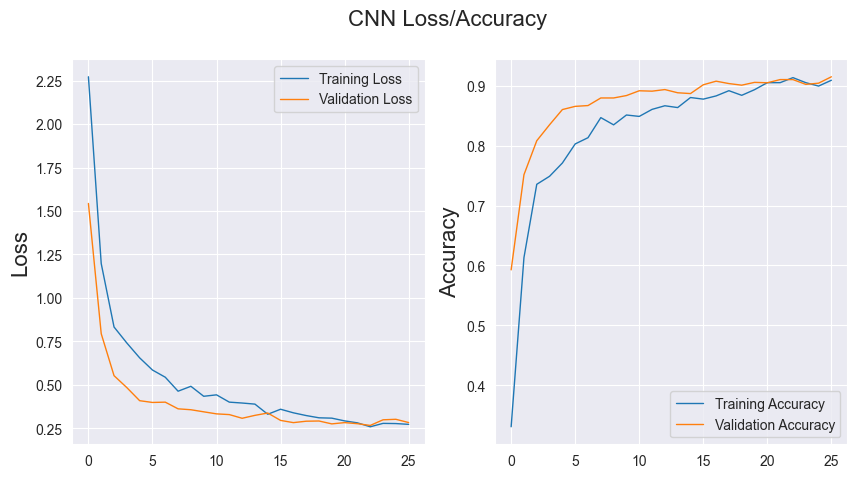

In [55]:
cnn_18 = CNN(base_model='MobileNet', model_name='MobileNet_7')

cnn_18.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_18.add(tf.keras.layers.BatchNormalization())
cnn_18.add(tf.keras.layers.Dropout(0.1))
cnn_18.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_18.add(tf.keras.layers.BatchNormalization())
cnn_18.add(tf.keras.layers.Dropout(0.1))
cnn_18.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_18.add(tf.keras.layers.BatchNormalization())
cnn_18.add(tf.keras.layers.Dropout(0.1))
cnn_18.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_18.add(tf.keras.layers.BatchNormalization())
cnn_18.add(tf.keras.layers.Dropout(0.2))
cnn_18.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_18.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3)
cnn_18.save()

In [56]:
cnn_18.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 23s 8ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            105.0    0.0     0.0      0.0         0.0          0.0      1.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  248.0     2.0      1.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   222.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         2.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [57]:
cnn_18.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 12s 8ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             77.0    0.0     0.0      0.0         0.0          0.0      3.0         19.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   95.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    92.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          1.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_342 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_41 (Dropout)        (None, 1024)              0         
                                                                 
 dense_59 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_343 (Ba  (None, 512)

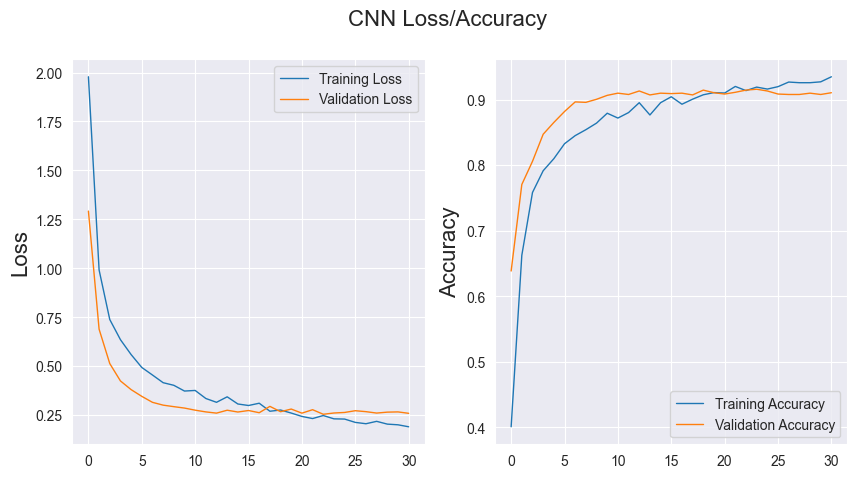

In [58]:
cnn_19 = CNN(base_model='MobileNet', model_name='MobileNet_8')

cnn_19.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_19.add(tf.keras.layers.BatchNormalization())
cnn_19.add(tf.keras.layers.Dropout(0.11))
cnn_19.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_19.add(tf.keras.layers.BatchNormalization())
cnn_19.add(tf.keras.layers.Dropout(0.11))
cnn_19.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_19.add(tf.keras.layers.BatchNormalization())
cnn_19.add(tf.keras.layers.Dropout(0.11))
cnn_19.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_19.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_19.save()

In [59]:
cnn_19.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 21s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            116.0    0.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  252.0     2.0      3.0         0.0          0.0      0.0          0.0       1.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   218.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    159.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [60]:
cnn_19.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             85.0    0.0     0.0      0.0         0.0          0.0      2.0         11.0       0.0     0.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    91.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          1.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 1056)              4269716   
                                                                 
 batch_normalization_345 (Ba  (None, 1056)             4224      
 tchNormalization)                                               
                                                                 
 dropout_44 (Dropout)        (None, 1056)              0         
                                                                 
 dense_63 (Dense)            (None, 1024)              1082368   
                                                                 
 batch_normalization_346 (Ba  (None, 1024)             4096      
 tchNormalization)                       

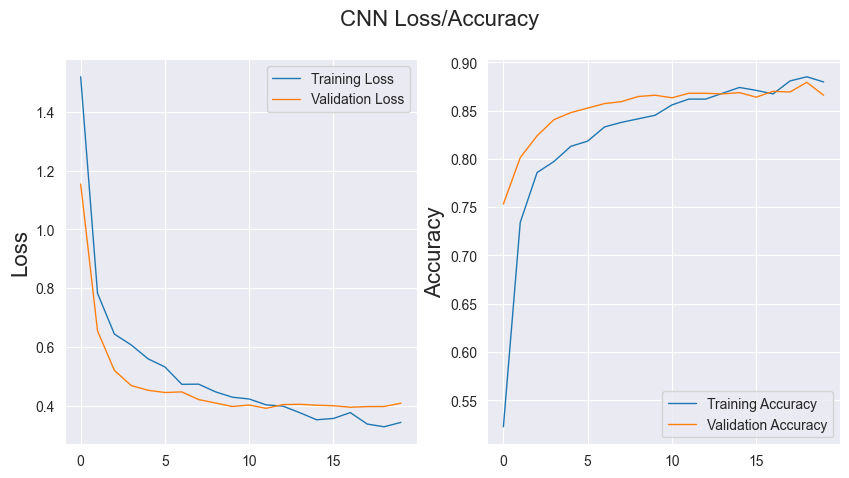

In [61]:
cnn_20 = CNN(base_model='NASNetMobile', model_name='NASNetMobile_2')

cnn_20.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_20.add(tf.keras.layers.BatchNormalization())
cnn_20.add(tf.keras.layers.Dropout(0.1))
cnn_20.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_20.add(tf.keras.layers.BatchNormalization())
cnn_20.add(tf.keras.layers.Dropout(0.1))
cnn_20.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_20.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_20.save()

In [62]:
cnn_20.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 146s 48ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            110.0    0.0     0.0      0.0         0.0          0.0      2.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  237.0     1.0      0.0         2.0          0.0      0.0          0.0       1.0     0.0          16.0    0.0     0.0     0.0            3.0
Forest               0.0    0.0   216.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    156.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0       

In [63]:
cnn_20.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 72s 48ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             79.0    0.0     0.0      0.0         0.0          0.0      3.0         16.0       0.0     1.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   89.0     1.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           9.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    85.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     94.0         0.0          1.0      0.0          0.0       0.0     0.0           4.0    0.0     1.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_550 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout_46 (Dropout)        (None, 1536)              0         
                                                                 
 dense_66 (Dense)            (None, 1024)              1573888   
                                                                 
 batch_normalization_551 (Ba  (None, 1024

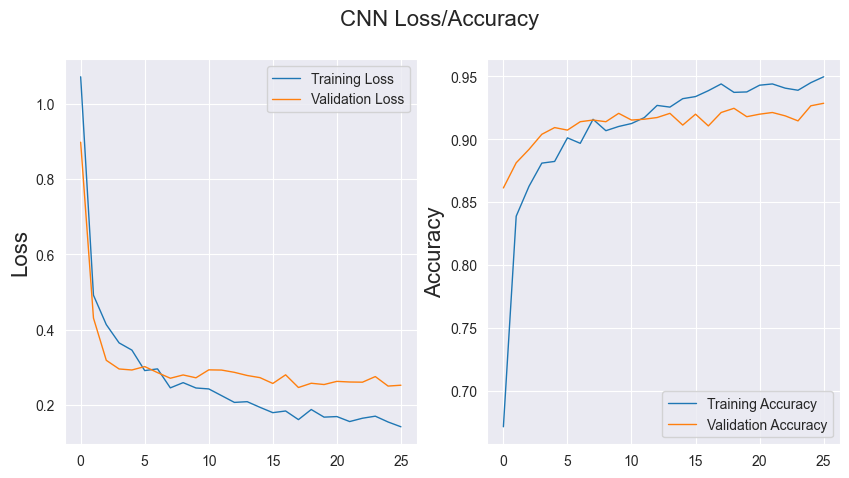

In [64]:
cnn_21 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_2')

cnn_21.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_21.add(tf.keras.layers.BatchNormalization())
cnn_21.add(tf.keras.layers.Dropout(0.1))
cnn_21.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_21.add(tf.keras.layers.BatchNormalization())
cnn_21.add(tf.keras.layers.Dropout(0.1))
cnn_21.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_21.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_21.save()

In [65]:
cnn_21.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 124s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            110.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  254.0     1.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   218.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           7.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    152.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     7.0     0.0       

In [66]:
cnn_21.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 61s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             83.0    0.0     0.0      0.0         0.0          0.0      0.0         17.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   94.0     0.0      1.0         1.0          0.0      0.0          0.0       1.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    90.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           8.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     93.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     5.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_556 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_48 (Dropout)        (None, 2048)              0         
                                                                 
 dense_69 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_557 (Ba  (None, 1024)             4096      
 tchNormalization)                       

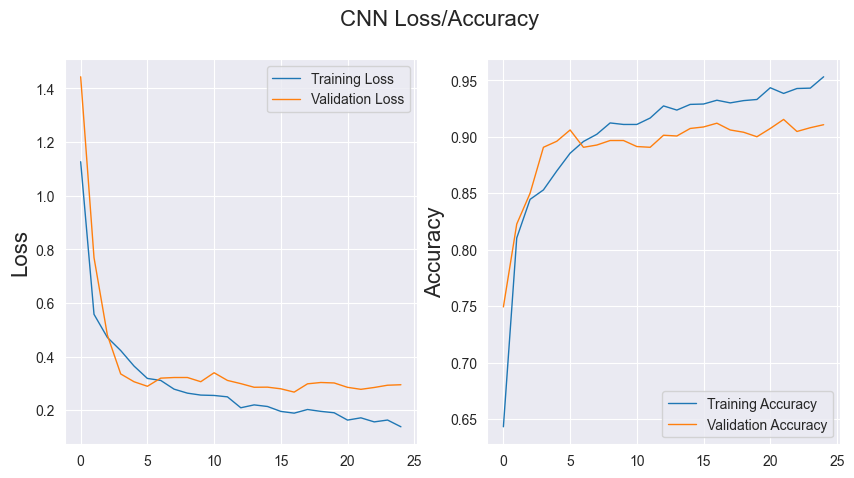

In [67]:
cnn_22 = CNN(base_model='Xception',model_name='xception_2')

cnn_22.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_22.add(tf.keras.layers.BatchNormalization())
cnn_22.add(tf.keras.layers.Dropout(0.1))
cnn_22.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_22.add(tf.keras.layers.BatchNormalization())
cnn_22.add(tf.keras.layers.Dropout(0.1))
cnn_22.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_22.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_22.save()

In [68]:
cnn_22.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 32s 10ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  253.0     1.0      1.0         0.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0   215.0      0.0         1.0          0.0      0.0          0.0       2.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    159.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     1.0     0.0        

In [69]:
cnn_22.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 16s 11ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             92.0    0.0     0.0      0.0         0.0          0.0      0.0          8.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    86.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          11.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     92.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     6.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_562 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_50 (Dropout)        (None, 2048)              0         
                                                                 
 dense_72 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_563 (Ba  (None, 512)              2048      
 tchNormalization)                       

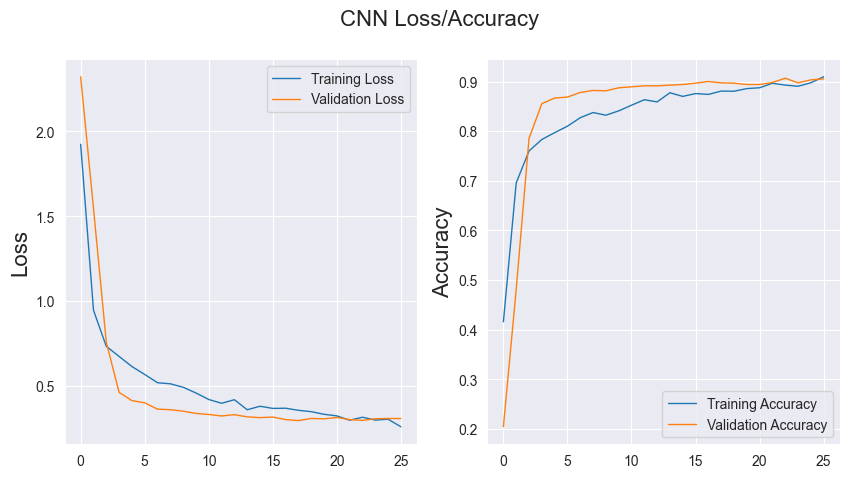

In [70]:
cnn_23 = CNN(base_model='Xception',model_name='xception_3')

cnn_23.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_23.add(tf.keras.layers.BatchNormalization())
cnn_23.add(tf.keras.layers.Dropout(0.1))
cnn_23.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_23.add(tf.keras.layers.BatchNormalization())
cnn_23.add(tf.keras.layers.Dropout(0.1))
cnn_23.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_23.add(tf.keras.layers.BatchNormalization())
cnn_23.add(tf.keras.layers.Dropout(0.1))
cnn_23.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_23.add(tf.keras.layers.BatchNormalization())
cnn_23.add(tf.keras.layers.Dropout(0.1))
cnn_23.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_23.add(tf.keras.layers.BatchNormalization())
cnn_23.add(tf.keras.layers.Dropout(0.1))
cnn_23.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_23.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_23.save()

In [71]:
cnn_23.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 35s 12ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            110.0    0.0     0.0      0.0         0.0          0.0      0.0          5.0       0.0     1.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  250.0     1.0      2.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    2.0   207.0      0.0         1.0          0.0      0.0          0.0       4.0     0.0          13.0    0.0     0.0     0.0            1.0
Highway              0.0    0.0     0.0    155.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0        

In [72]:
cnn_23.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 18s 12ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             82.0    0.0     0.0      0.0         0.0          0.0      0.0         18.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   95.0     0.0      0.0         2.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    84.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          12.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     92.0         1.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     5.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_571 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_55 (Dropout)        (None, 2048)              0         
                                                                 
 dense_78 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_572 (Ba  (None, 512)              2048      
 tchNormalization)                       

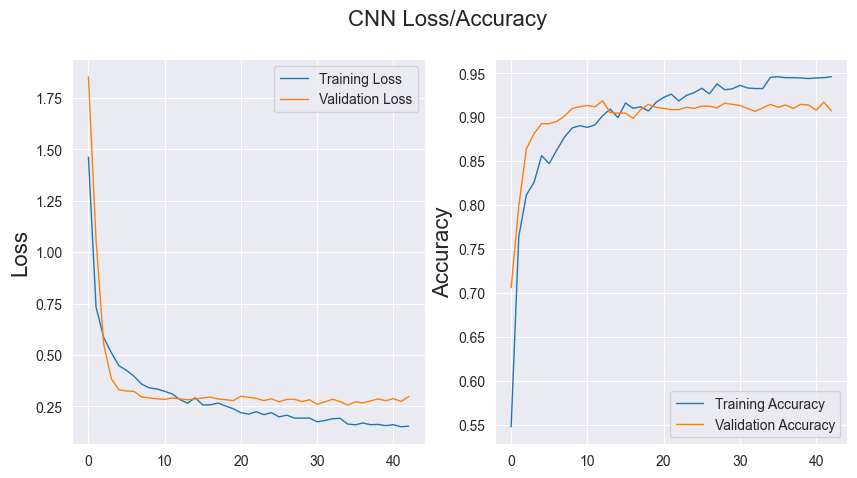

In [73]:
cnn_24 = CNN(base_model='Xception',model_name='xception_4')

cnn_24.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_24.add(tf.keras.layers.BatchNormalization())
cnn_24.add(tf.keras.layers.Dropout(0.1))
cnn_24.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_24.add(tf.keras.layers.BatchNormalization())
cnn_24.add(tf.keras.layers.Dropout(0.1))
cnn_24.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_24.add(tf.keras.layers.BatchNormalization())
cnn_24.add(tf.keras.layers.Dropout(0.1))
cnn_24.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_24.train(training_dir, validation_dir, epochs=50, early_stopping_patience=8)
cnn_24.save()

In [74]:
cnn_24.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 34s 11ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            116.0    0.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  252.0     1.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           5.0    0.0     0.0     0.0            1.0
Forest               0.0    1.0   222.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           4.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     2.0     0.0        

In [75]:
cnn_24.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 17s 11ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             90.0    0.0     0.0      0.0         0.0          0.0      0.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   91.0     0.0      2.0         0.0          0.0      0.0          0.0       0.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    92.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     92.0         0.0          0.0      0.0          0.0       1.0     0.0           1.0    0.0     6.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_574 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_58 (Dropout)        (None, 1024)              0         
                                                                 
 dense_82 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_575 (Ba  (None, 512)

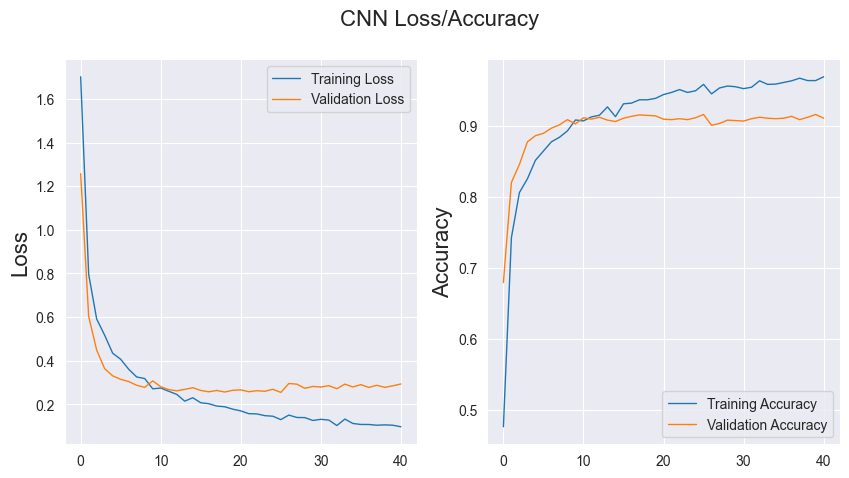

In [76]:

cnn_25 = CNN(base_model='MobileNet', model_name='MobileNet_9')

cnn_25.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_25.add(tf.keras.layers.BatchNormalization())
cnn_25.add(tf.keras.layers.Dropout(0.02))
cnn_25.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_25.add(tf.keras.layers.BatchNormalization())
cnn_25.add(tf.keras.layers.Dropout(0.02))
cnn_25.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_25.add(tf.keras.layers.BatchNormalization())
cnn_25.add(tf.keras.layers.Dropout(0.02))
cnn_25.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_25.train(training_dir, validation_dir, epochs=50, early_stopping_patience=15)
cnn_25.save()

In [77]:
cnn_25.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 20s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            116.0    0.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  253.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   225.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    159.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0         

In [78]:
cnn_25.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 11s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             78.0    0.0     0.0      0.0         0.0          0.0      4.0         14.0       0.0     1.0           0.0    3.0     0.0     0.0            0.0
Coast                0.0   95.0     0.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    94.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           4.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     94.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     4.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_577 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_61 (Dropout)        (None, 1024)              0         
                                                                 
 dense_86 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_578 (Ba  (None, 512)

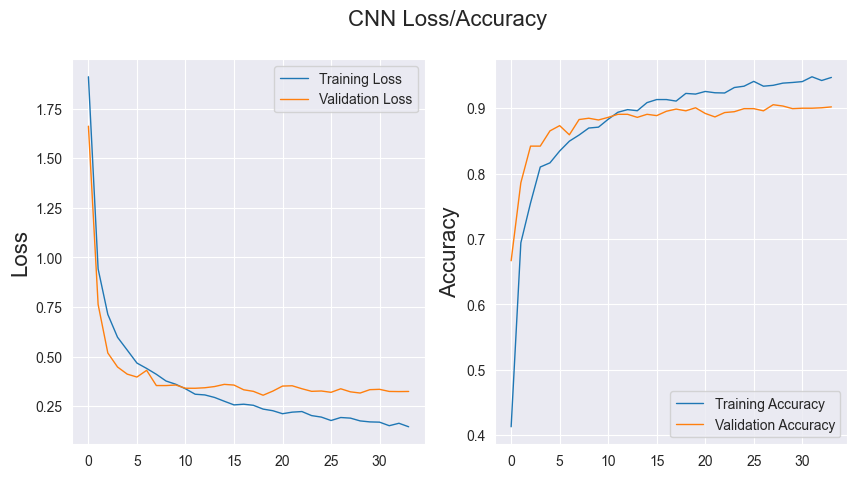

In [79]:

cnn_26 = CNN(base_model='MobileNet', model_name='MobileNet_10')

cnn_26.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_26.add(tf.keras.layers.BatchNormalization())
cnn_26.add(tf.keras.layers.Dropout(0.02))
cnn_26.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_26.add(tf.keras.layers.BatchNormalization())
cnn_26.add(tf.keras.layers.Dropout(0.02))
cnn_26.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_26.add(tf.keras.layers.BatchNormalization())
cnn_26.add(tf.keras.layers.Dropout(0.02))
cnn_26.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_26.add(tf.keras.layers.BatchNormalization())
cnn_26.add(tf.keras.layers.Dropout(0.02))
cnn_26.add(tf.keras.layers.Dense(1024/2, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_26.add(tf.keras.layers.BatchNormalization())
cnn_26.add(tf.keras.layers.Dropout(0.02))
cnn_26.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_26.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_26.save()

In [80]:
cnn_26.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 23s 8ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  249.0     2.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0   221.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           4.0    0.0     1.0     0.0            0.0
Highway              0.0    0.0     0.0    156.0         1.0          0.0      0.0          0.0       0.0     1.0           0.0    0.0     2.0     0.0         

In [81]:
cnn_26.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 12s 8ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             80.0    0.0     0.0      0.0         0.0          0.0      5.0         13.0       0.0     0.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   95.0     0.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    92.0      0.0         1.0          0.0      0.0          0.0       2.0     0.0           5.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     94.0         0.0          1.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0       



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_582 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dropout_66 (Dropout)        (None, 1024)              0         
                                                                 
 dense_92 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_583 (Ba  (None, 512)

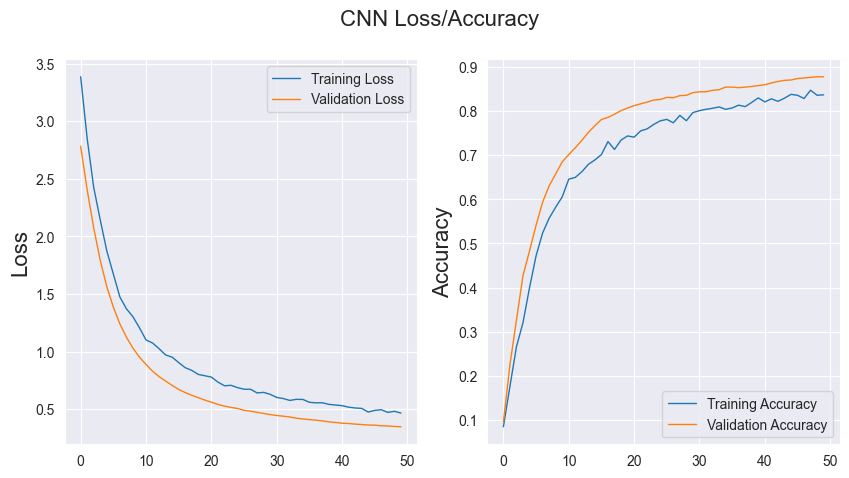

In [82]:
cnn_27 = CNN(base_model='MobileNet', model_name='MobileNet_11')

cnn_27.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_27.add(tf.keras.layers.BatchNormalization())
cnn_27.add(tf.keras.layers.Dropout(0.15))
cnn_27.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_27.add(tf.keras.layers.BatchNormalization())
cnn_27.add(tf.keras.layers.Dropout(0.15))
cnn_27.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_27.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3,learning_rate=0.00001)
cnn_27.save()

In [83]:
cnn_27.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 18s 6ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            105.0    0.0     0.0      0.0         0.0          0.0      1.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  234.0     1.0      4.0         1.0          0.0      0.0          0.0       0.0     0.0          20.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   208.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          16.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    151.0         2.0          1.0      0.0          0.0       0.0     0.0           2.0    0.0     4.0     0.0         

In [84]:
cnn_27.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 9s 6ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             75.0    1.0     0.0      0.0         0.0          0.0      5.0         18.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   91.0     0.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           7.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    89.0      0.0         1.0          0.0      0.0          0.0       1.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     95.0         0.0          2.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0        



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_588 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_68 (Dropout)        (None, 2048)              0         
                                                                 
 dense_95 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_589 (Ba  (None, 512)              2048      
 tchNormalization)                       

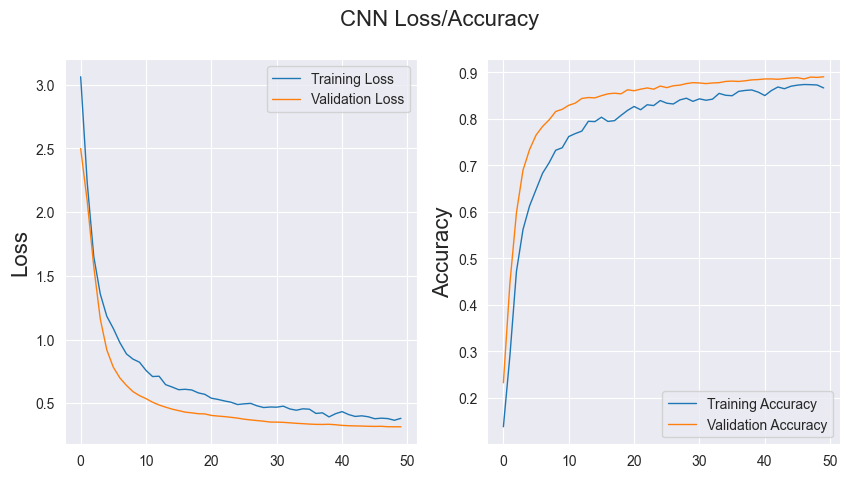

In [85]:
cnn_28 = CNN(base_model='Xception',model_name='xception_5')

cnn_28.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_28.add(tf.keras.layers.BatchNormalization())
cnn_28.add(tf.keras.layers.Dropout(0.15))
cnn_28.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_28.add(tf.keras.layers.BatchNormalization())
cnn_28.add(tf.keras.layers.Dropout(0.15))
cnn_28.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_28.train(training_dir, validation_dir, epochs=50, early_stopping_patience=3,learning_rate=0.00001)
cnn_28.save()

In [86]:
cnn_28.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 32s 11ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            112.0    0.0     0.0      0.0         0.0          0.0      0.0          4.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  249.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0          10.0    0.0     0.0     0.0            0.0
Forest               0.0    3.0   191.0      0.0         1.0          0.0      0.0          0.0       9.0     0.0          24.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    151.0         3.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     3.0     0.0        

In [87]:
cnn_28.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 16s 11ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             83.0    0.0     0.0      0.0         0.0          0.0      0.0         17.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   92.0     0.0      1.0         3.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    77.0      0.0         0.0          0.0      0.0          0.0       5.0     0.0          17.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     94.0         0.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_793 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout_70 (Dropout)        (None, 1536)              0         
                                                                 
 dense_98 (Dense)            (None, 1024)              1573888   
                                                                 
 batch_normalization_794 (Ba  (None, 1024

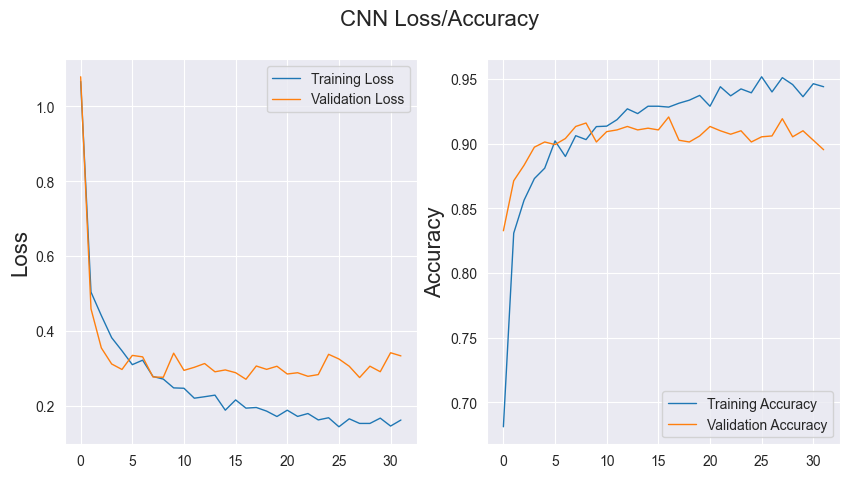

In [88]:
cnn_29 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_3')

cnn_29.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_29.add(tf.keras.layers.BatchNormalization())
cnn_29.add(tf.keras.layers.Dropout(0.1))
cnn_29.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_29.add(tf.keras.layers.BatchNormalization())
cnn_29.add(tf.keras.layers.Dropout(0.1))
cnn_29.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_29.add(tf.keras.layers.BatchNormalization())
cnn_29.add(tf.keras.layers.Dropout(0.1))
cnn_29.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_29.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_29.save()

In [89]:
cnn_29.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 117s 38ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            114.0    0.0     0.0      0.0         0.0          0.0      0.0          2.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  257.0     1.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            1.0
Forest               0.0    1.0   218.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           6.0    0.0     0.0     0.0            1.0
Highway              0.0    0.0     0.0    153.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     7.0     0.0       

In [91]:
cnn_29.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 58s 39ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             87.0    0.0     0.0      0.0         0.0          0.0      0.0         13.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   92.0     0.0      2.0         1.0          0.0      0.0          0.0       2.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    2.0    88.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           8.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     93.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     7.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_999 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout_73 (Dropout)        (None, 1536)              0         
                                                                 
 dense_102 (Dense)           (None, 1024)              1573888   
                                                                 
 batch_normalization_1000 (B  (None, 1024

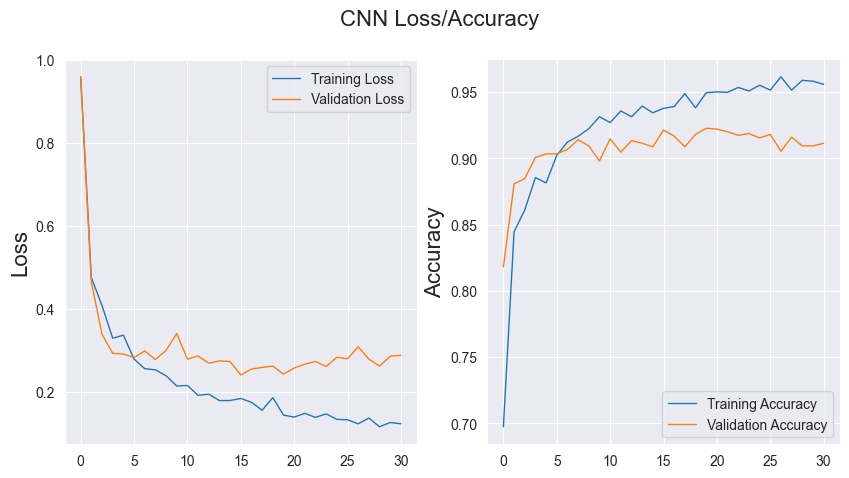

In [92]:
cnn_30 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_4')

cnn_30.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_30.add(tf.keras.layers.BatchNormalization())
cnn_30.add(tf.keras.layers.Dropout(0.05))
cnn_30.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_30.add(tf.keras.layers.BatchNormalization())
cnn_30.add(tf.keras.layers.Dropout(0.05))
cnn_30.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_30.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_30.save()

In [93]:
cnn_30.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 128s 42ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            114.0    0.0     0.0      0.0         0.0          0.0      0.0          2.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  253.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   223.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           4.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    155.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     4.0     0.0       

In [94]:
cnn_30.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 63s 42ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             90.0    0.0     0.0      0.0         0.0          0.0      0.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   93.0     0.0      1.0         1.0          0.0      0.0          0.0       0.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    91.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     94.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     4.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_1204 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dropout_75 (Dropout)        (None, 1536)              0         
                                                                 
 dense_105 (Dense)           (None, 2048)              3147776   
                                                                 
 batch_normalization_1205 (B  (None, 2048

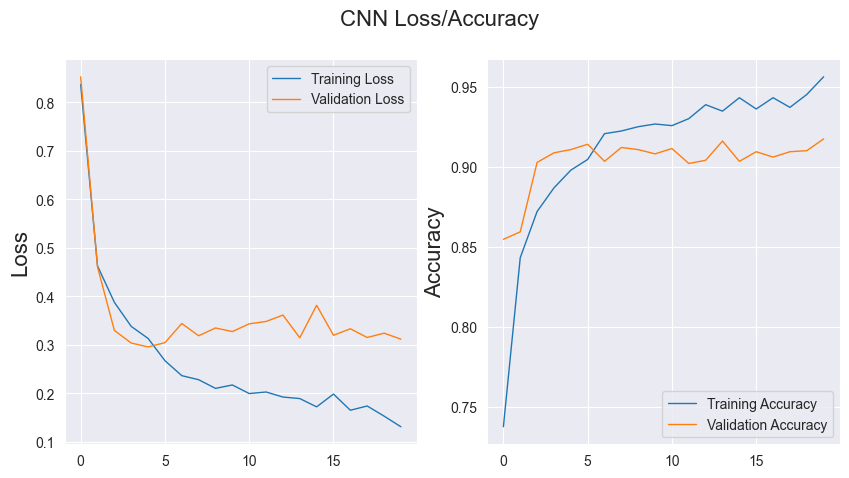

In [95]:
cnn_31 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_5')

cnn_31.add(tf.keras.layers.Dense(1024*2, activation='relu'))
cnn_31.add(tf.keras.layers.BatchNormalization())
cnn_31.add(tf.keras.layers.Dropout(0.1))
cnn_31.add(tf.keras.layers.Dense(1024*2, activation='relu'))
cnn_31.add(tf.keras.layers.BatchNormalization())
cnn_31.add(tf.keras.layers.Dropout(0.1))
cnn_30.add(tf.keras.layers.Dense(1024*2, activation='relu'))
cnn_30.add(tf.keras.layers.BatchNormalization())
cnn_30.add(tf.keras.layers.Dropout(0.1))
cnn_31.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_31.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_31.save()

In [96]:
cnn_31.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 128s 42ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            114.0    0.0     0.0      0.0         0.0          0.0      0.0          2.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  245.0     1.0      0.0         2.0          0.0      0.0          0.0       0.0     0.0          11.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   209.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          15.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    152.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     8.0     0.0       

In [97]:
cnn_31.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 63s 42ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             94.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   91.0     0.0      2.0         1.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    89.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     95.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     1.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_1410 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dropout_78 (Dropout)        (None, 1536)              0         
                                                                 
 dense_109 (Dense)           (None, 1024)              1573888   
                                                                 
 batch_normalization_1411 (B  (None, 1024

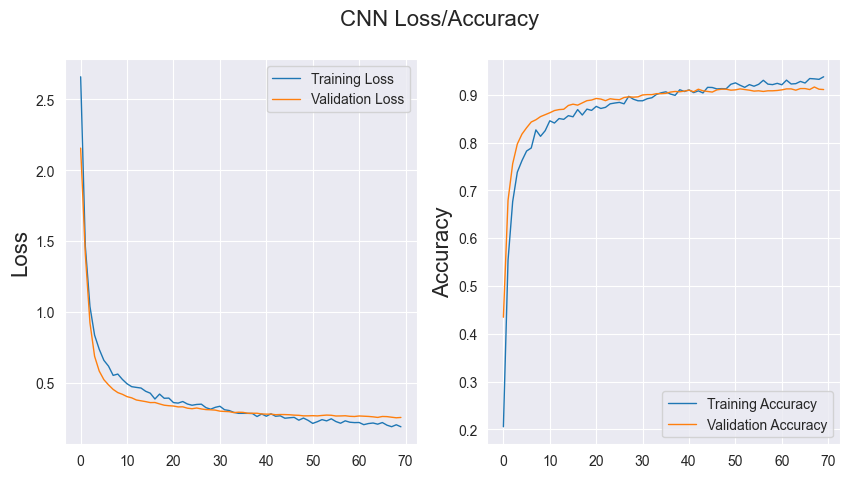

In [98]:
cnn_32 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_6')

cnn_32.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_32.add(tf.keras.layers.BatchNormalization())
cnn_32.add(tf.keras.layers.Dropout(0.08))
cnn_32.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_32.add(tf.keras.layers.BatchNormalization())
cnn_32.add(tf.keras.layers.Dropout(0.08))
cnn_32.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_32.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15,learning_rate=0.00001)
cnn_32.save()

In [99]:
cnn_32.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 128s 42ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  256.0     1.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   215.0      0.0         1.0          0.0      0.0          0.0       3.0     0.0           9.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    153.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     6.0     0.0       

In [100]:
cnn_32.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 63s 42ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             87.0    0.0     0.0      0.0         0.0          0.0      0.0         13.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   94.0     0.0      2.0         0.0          0.0      0.0          0.0       2.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    92.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           5.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization_1412 (B  (None, 1024)             4096      
 atchNormalization)                                              
                                                                 
 dropout_80 (Dropout)        (None, 1024)              0         
                                                                 
 dense_112 (Dense)           (None, 512)               524800    
                                                                 
 batch_normalization_1413 (B  (None, 512)

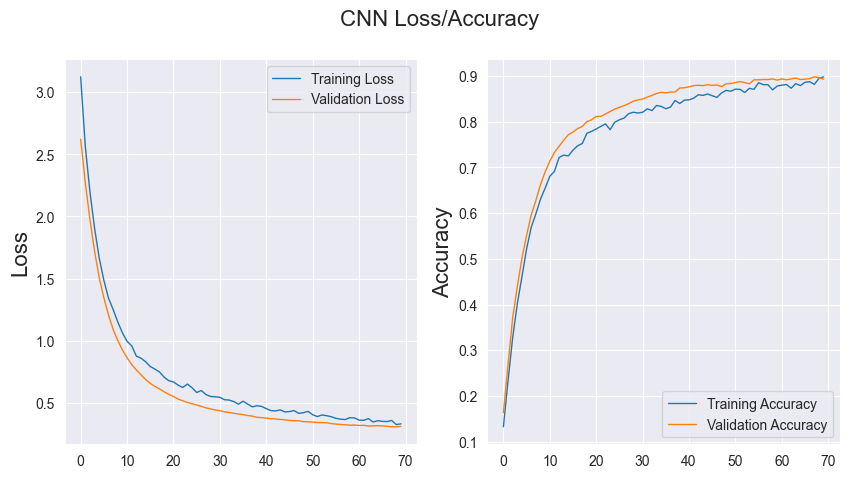

In [101]:
cnn_33 = CNN(base_model='MobileNet', model_name='MobileNet_12')

cnn_33.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_33.add(tf.keras.layers.BatchNormalization())
cnn_33.add(tf.keras.layers.Dropout(0.08))
cnn_33.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn_33.add(tf.keras.layers.BatchNormalization())
cnn_33.add(tf.keras.layers.Dropout(0.08))
cnn_33.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_33.train(training_dir, validation_dir, epochs=70, early_stopping_patience=5,learning_rate=0.00001)
cnn_33.save()

In [102]:
cnn_33.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 20s 6ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            106.0    0.0     0.0      0.0         0.0          0.0      0.0          9.0       0.0     1.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  240.0     1.0      3.0         0.0          0.0      0.0          0.0       1.0     0.0          15.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   213.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    154.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     5.0     0.0         

In [103]:
cnn_33.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 10s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             74.0    0.0     0.0      0.0         0.0          0.0      3.0         21.0       0.0     0.0           0.0    2.0     0.0     0.0            0.0
Coast                0.0   94.0     0.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    88.0      0.0         1.0          0.0      0.0          0.0       3.0     0.0           7.0    0.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     92.0         0.0          2.0      0.0          0.0       0.0     0.0           2.0    0.0     4.0     0.0       

In [108]:
for x in os.listdir('src/cnns'):
    print('src/cnns/'+x)

src/cnns/DenseNet121_1
src/cnns/DenseNet169_1
src/cnns/DenseNet201_1
src/cnns/InceptionResNetV2_1
src/cnns/InceptionResNetV2_2
src/cnns/InceptionResNetV2_3
src/cnns/InceptionResNetV2_4
src/cnns/InceptionResNetV2_5
src/cnns/InceptionResNetV2_6
src/cnns/InceptionV3_1
src/cnns/MobileNetV2_1
src/cnns/MobileNet_1
src/cnns/MobileNet_10
src/cnns/MobileNet_11
src/cnns/MobileNet_12
src/cnns/MobileNet_2
src/cnns/MobileNet_3
src/cnns/MobileNet_4
src/cnns/MobileNet_5
src/cnns/MobileNet_6
src/cnns/MobileNet_7
src/cnns/MobileNet_8
src/cnns/MobileNet_9
src/cnns/NASNetMobile_1
src/cnns/NASNetMobile_2
src/cnns/overall_results.xlsx
src/cnns/resnet50_1
src/cnns/vgg19_1
src/cnns/xception_1
src/cnns/xception_2
src/cnns/xception_3
src/cnns/xception_4
src/cnns/xception_5
src/cnns/~$overall_results.xlsx




Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_408 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense_4 (Dense)             (None, 1024)              1573888   
                                                                 
 batch_normalization_409 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                          

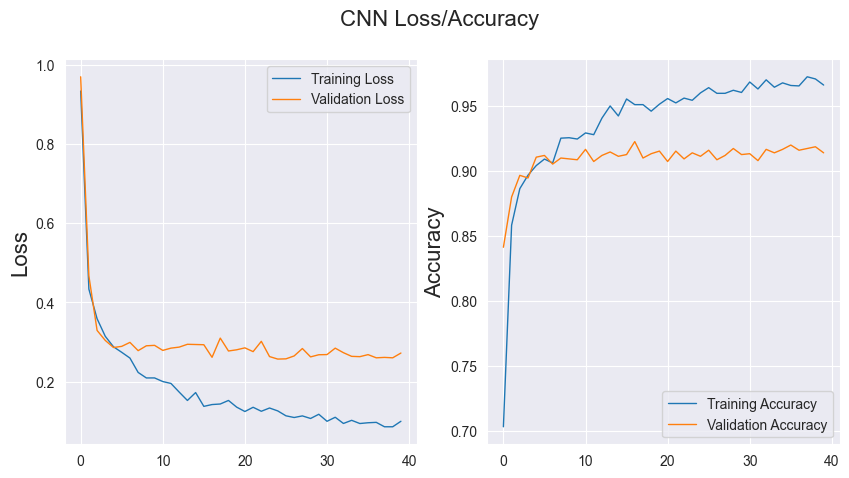

In [7]:
cnn_34 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_7')

cnn_34.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_34.add(tf.keras.layers.BatchNormalization())
cnn_34.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_34.add(tf.keras.layers.BatchNormalization())
cnn_34.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_34.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_34.save()

In [8]:
cnn_34.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            115.0    0.0     0.0      0.0         0.0          0.0      0.0          1.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  250.0     1.0      0.0         2.0          0.0      0.0          0.0       1.0     0.0           5.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   222.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    160.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0       

In [9]:
cnn_34.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             87.0    0.0     0.0      0.0         0.0          0.0      0.0         13.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   89.0     0.0      2.0         2.0          0.0      0.0          0.0       2.0     0.0           5.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    91.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           8.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     97.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     2.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_613 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)             (None, 1024)              1573888   
                                                                 
 batch_normalization_614 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                          

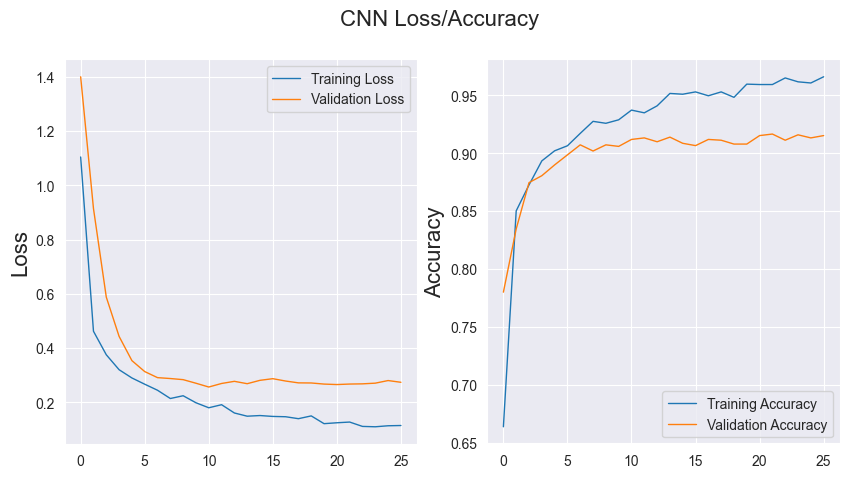

In [10]:
cnn_35 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_8')

cnn_35.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_35.add(tf.keras.layers.BatchNormalization())
cnn_35.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_35.add(tf.keras.layers.BatchNormalization())
cnn_35.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_35.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15, training_batch_size = 64, validation_batch_size = 64)
cnn_35.save()

In [11]:
cnn_35.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            111.0    0.0     0.0      0.0         0.0          0.0      0.0          5.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  243.0     1.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0          14.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   214.0      0.0         1.0          0.0      0.0          0.0       2.0     0.0          11.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    148.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0    10.0     0.0       

In [12]:
cnn_35.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             86.0    0.0     0.0      0.0         0.0          0.0      1.0         13.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   88.0     0.0      2.0         0.0          0.0      0.0          0.0       2.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    87.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           9.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_818 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            (None, 1024)              1573888   
                                                                 
 batch_normalization_819 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                          

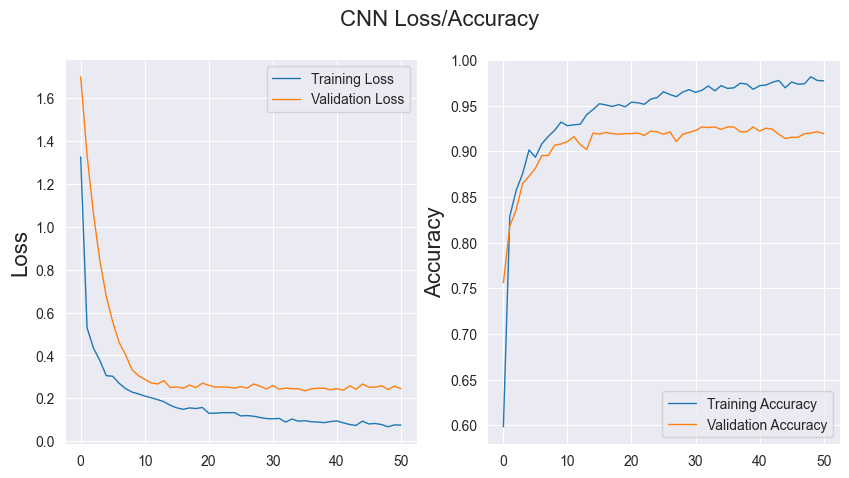

In [13]:
cnn_36 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_9')

cnn_36.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_36.add(tf.keras.layers.BatchNormalization())
cnn_36.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_36.add(tf.keras.layers.BatchNormalization())
cnn_36.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_36.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15, training_batch_size = 128, validation_batch_size = 128)
cnn_36.save()

In [14]:
cnn_36.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            114.0    0.0     0.0      0.0         0.0          0.0      0.0          2.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  256.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   220.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           6.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    160.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0       

In [15]:
cnn_36.predict(validation_dir, "Training")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             86.0    0.0     0.0      0.0         0.0          0.0      1.0         13.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   93.0     0.0      2.0         1.0          0.0      0.0          0.0       0.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    91.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           6.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0        



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 1536)              0         
                                                                 
 batch_normalization_2253 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_31 (Dense)            (None, 1024)              1573888   
                                                                 
 dropout_13 (Dropout)        (None, 1024)

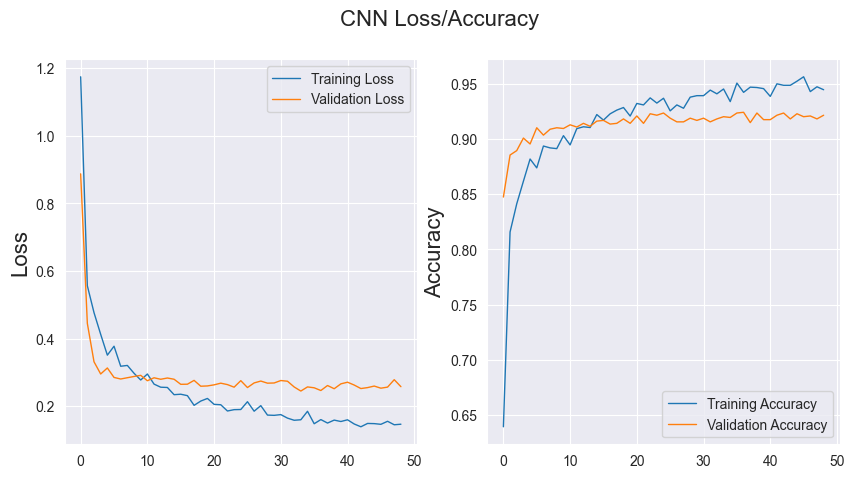

In [34]:
cnn_37 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_10')

cnn_37.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_37.add(tf.keras.layers.Dropout(0.1))
cnn_37.add(tf.keras.layers.BatchNormalization())
cnn_37.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_37.add(tf.keras.layers.Dropout(0.1))
cnn_37.add(tf.keras.layers.BatchNormalization())
cnn_37.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_37.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_37.save()

In [35]:
cnn_37.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 127s 42ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  252.0     1.0      1.0         0.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   219.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           7.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    158.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     2.0     0.0       

In [37]:
cnn_37.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             89.0    0.0     0.0      0.0         0.0          0.0      0.0         11.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   92.0     0.0      1.0         1.0          1.0      0.0          0.0       1.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    88.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0          10.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     95.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 batch_normalization_1228 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_16 (Dense)            (None, 4096)              6295552   
                                                                 
 dropout_3 (Dropout)         (None, 4096) 

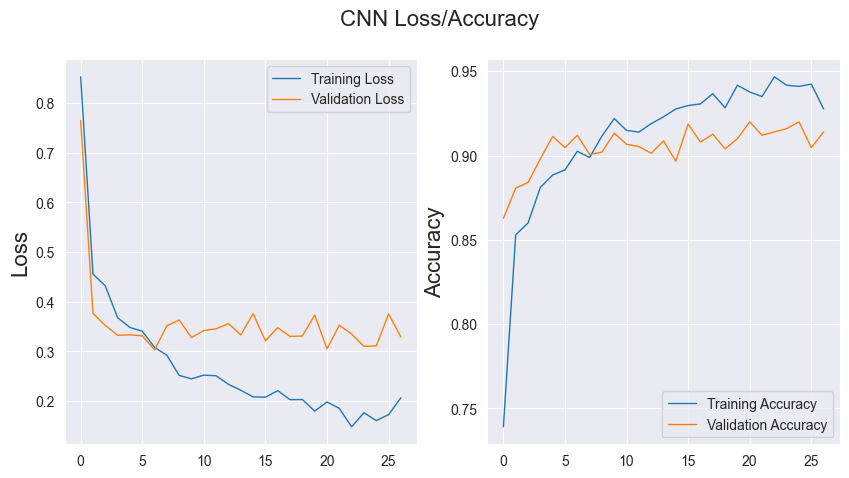

In [19]:
cnn_38 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_11')

cnn_38.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_38.add(tf.keras.layers.Dropout(0.1))
cnn_38.add(tf.keras.layers.BatchNormalization())
cnn_38.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_38.add(tf.keras.layers.Dropout(0.1))
cnn_38.add(tf.keras.layers.BatchNormalization())
cnn_38.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_38.train(training_dir, validation_dir, epochs=70, early_stopping_patience=20)
cnn_38.save()

In [20]:
cnn_38.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            113.0    0.0     0.0      0.0         0.0          0.0      0.0          3.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  252.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           6.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   209.0      0.0         0.0          0.0      0.0          0.0       6.0     0.0          12.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    152.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     6.0     0.0       

In [21]:
cnn_38.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             87.0    0.0     0.0      0.0         0.0          0.0      0.0         10.0       0.0     3.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   96.0     0.0      1.0         0.0          0.0      0.0          0.0       0.0     0.0           3.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    86.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          10.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     96.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 1536)              0         
                                                                 
 batch_normalization_1433 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_19 (Dense)            (None, 4096)              6295552   
                                                                 
 dropout_5 (Dropout)         (None, 4096) 

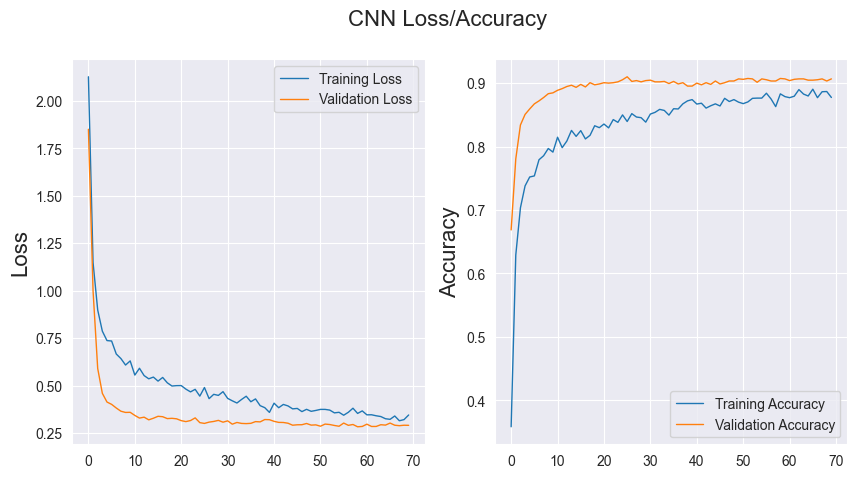

In [22]:
cnn_39 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_13')

cnn_39.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_39.add(tf.keras.layers.Dropout(0.1))
cnn_39.add(tf.keras.layers.BatchNormalization())
cnn_39.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_39.add(tf.keras.layers.Dropout(0.1))
cnn_39.add(tf.keras.layers.BatchNormalization())
cnn_39.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_39.train(training_dir, validation_dir, epochs=70, early_stopping_patience=20, learning_rate=0.00001,zoom_range=0.4, rotation_range=40, shear_range=0.4, brightness_range=(0.2, 0.8), horizontal_flip=True, width_shift_range=0.3, height_shift_range=0.3)
cnn_39.save()

In [23]:
cnn_39.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            105.0    0.0     0.0      0.0         0.0          0.0      0.0         11.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  246.0     1.0      0.0         2.0          0.0      0.0          0.0       0.0     0.0          11.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   219.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           7.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    146.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0    13.0     0.0       

In [24]:
cnn_39.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             78.0    0.0     0.0      0.0         0.0          0.0      0.0         22.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   90.0     0.0      2.0         2.0          0.0      0.0          0.0       2.0     0.0           4.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    90.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           7.0    1.0     0.0     1.0            0.0
Highway              0.0    0.0     0.0     93.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     7.0     0.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 1536)              0         
                                                                 
 batch_normalization_1638 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_22 (Dense)            (None, 1024)              1573888   
                                                                 
 dropout_7 (Dropout)         (None, 1024) 

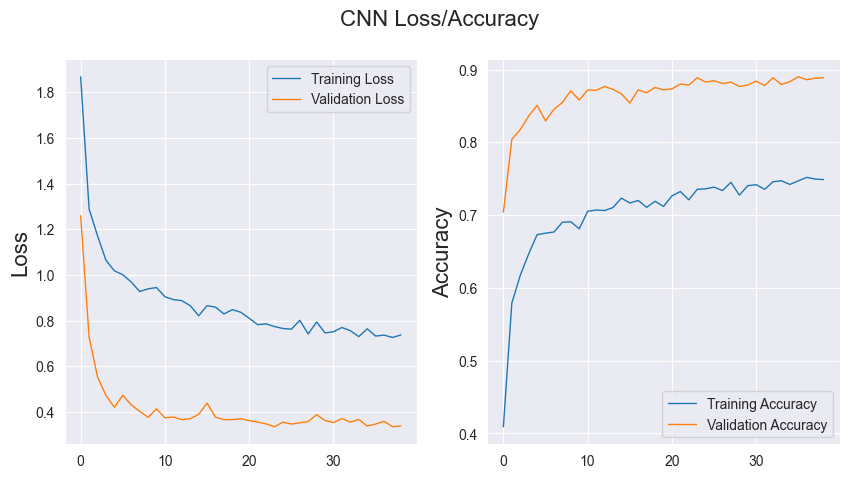

In [25]:
cnn_40 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_14')

cnn_40.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_40.add(tf.keras.layers.Dropout(0.1))
cnn_40.add(tf.keras.layers.BatchNormalization())
cnn_40.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_40.add(tf.keras.layers.Dropout(0.1))
cnn_40.add(tf.keras.layers.BatchNormalization())
cnn_40.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_40.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15,zoom_range=[0.5, 1.5], rotation_range=90, shear_range=45.0, brightness_range=(0.2, 0.8), horizontal_flip=True, width_shift_range=0.4, height_shift_range=0.3)
cnn_40.save()

In [26]:
cnn_40.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 125s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            109.0    0.0     0.0      0.0         0.0          0.0      0.0          7.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  240.0     1.0      1.0         2.0          0.0      0.0          0.0       0.0     0.0          14.0    1.0     0.0     0.0            1.0
Forest               0.0    1.0   210.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          13.0    0.0     0.0     2.0            0.0
Highway              0.0    0.0     0.0    149.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     8.0     0.0       

In [27]:
cnn_40.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             89.0    0.0     0.0      0.0         0.0          0.0      0.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            1.0
Coast                0.0   91.0     0.0      2.0         0.0          0.0      0.0          0.0       1.0     0.0           5.0    0.0     0.0     0.0            1.0
Forest               0.0    1.0    83.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          11.0    1.0     0.0     2.0            0.0
Highway              0.0    1.0     0.0     94.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     4.0     1.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_1843 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dropout_8 (Dropout)         (None, 1536)              0         
                                                                 
 dense_25 (Dense)            (None, 1024)              1573888   
                                                                 
 batch_normalization_1844 (B  (None, 1024)

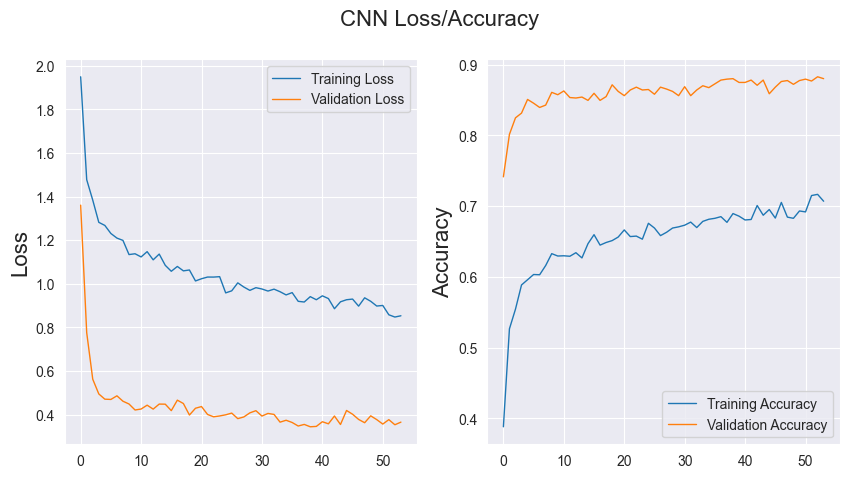

In [28]:
cnn_41 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_15')

cnn_41.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_41.add(tf.keras.layers.BatchNormalization())
cnn_41.add(tf.keras.layers.Dropout(0.1))
cnn_41.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_41.add(tf.keras.layers.BatchNormalization())
cnn_41.add(tf.keras.layers.Dropout(0.1))
cnn_41.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_41.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15,zoom_range=[0.3, 1.8], rotation_range=70, shear_range=45.0, brightness_range=(0.3, 0.75), horizontal_flip=True, width_shift_range=0.5, height_shift_range=0.5)
cnn_41.save()

In [29]:
cnn_41.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            108.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     1.0           1.0    0.0     0.0     0.0            0.0
Coast                0.0  245.0     1.0      1.0         0.0          0.0      0.0          0.0       2.0     0.0          11.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0   192.0      0.0         0.0          0.0      0.0          0.0      10.0     0.0          23.0    0.0     0.0     2.0            0.0
Highway              0.0    0.0     0.0    152.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     7.0     0.0       

In [30]:
cnn_41.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             88.0    0.0     0.0      0.0         0.0          0.0      2.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   88.0     0.0      1.0         1.0          0.0      0.0          0.0       2.0     0.0           7.0    0.0     0.0     0.0            1.0
Forest               0.0    1.0    79.0      0.0         0.0          0.0      1.0          0.0       6.0     0.0          10.0    1.0     0.0     2.0            0.0
Highway              0.0    1.0     0.0     95.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     1.0      



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_2048 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dropout_10 (Dropout)        (None, 1536)              0         
                                                                 
 dense_28 (Dense)            (None, 1024)              1573888   
                                                                 
 batch_normalization_2049 (B  (None, 1024)

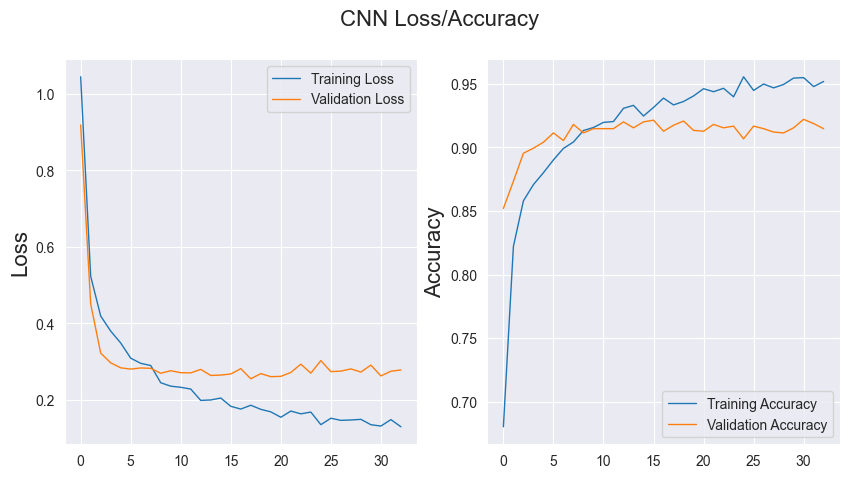

In [31]:
cnn_42 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_16', unfreezed_convolutional_layers = 1)

cnn_42.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_42.add(tf.keras.layers.BatchNormalization())
cnn_42.add(tf.keras.layers.Dropout(0.1))
cnn_42.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_42.add(tf.keras.layers.BatchNormalization())
cnn_42.add(tf.keras.layers.Dropout(0.1))
cnn_42.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_42.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_42.save()

In [32]:
cnn_42.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 126s 41ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            116.0    0.0     0.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  258.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           1.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0   208.0      0.0         0.0          0.0      0.0          0.0       4.0     0.0          15.0    0.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0    153.0         1.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     5.0     0.0       

In [33]:
cnn_42.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 41ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             90.0    0.0     0.0      0.0         0.0          0.0      0.0         10.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   97.0     0.0      0.0         1.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     0.0     0.0            0.0
Forest               0.0    1.0    84.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0          12.0    1.0     0.0     0.0            0.0
Highway              0.0    1.0     0.0     93.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     6.0     0.0      

In [43]:
cnn_43 = CNN(base_model='MobileNet', model_name='MobileNet_13')

cnn_43.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_43.add(tf.keras.layers.Dropout(0.1))
cnn_43.add(tf.keras.layers.BatchNormalization())
cnn_43.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_43.add(tf.keras.layers.Dropout(0.1))
cnn_43.add(tf.keras.layers.BatchNormalization())
cnn_43.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_43.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
cnn_43.save()



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_2665 (B  (None, 1024)             4096      
 atchNormalization)                                              
                                                                 
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_19 (Dropout)        (None, 1024)

NotFoundError: Graph execution error:

Detected at node 'sequential_13/mobilenet_1.00_224/conv1/Conv2D' defined at (most recent call last):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Diego\AppData\Local\Temp\ipykernel_14532\272831634.py", line 11, in <module>
      cnn_43.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15)
    File "c:\Users\Diego\CACHARREANDOPY\ICAI\ML2\DeepLearning\practica_final\ml2-deep-learning\src\cnn.py", line 173, in train
      history = self._model.fit(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_13/mobilenet_1.00_224/conv1/Conv2D'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node sequential_13/mobilenet_1.00_224/conv1/Conv2D}}]] [Op:__inference_train_function_1607552]

In [44]:
cnn_43.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 20s 7ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             13.0    1.0     2.0      0.0        34.0          0.0      0.0         32.0       6.0     3.0          22.0    0.0     1.0     2.0            0.0
Coast                8.0    0.0     2.0      4.0        11.0          0.0      0.0        131.0      62.0     4.0          36.0    0.0     0.0     2.0            0.0
Forest              10.0    1.0     1.0      1.0       114.0          0.0      0.0         58.0      30.0     2.0           7.0    0.0     0.0     4.0            0.0
Highway             39.0    1.0     0.0      5.0        11.0          0.0      1.0         13.0       8.0     8.0          64.0    6.0     1.0     3.0         

In [45]:
cnn_43.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 10s 7ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom              7.0    0.0     2.0      0.0        33.0          0.0      0.0         32.0       1.0     3.0          18.0    0.0     3.0     1.0            0.0
Coast                6.0    0.0     1.0      0.0         3.0          0.0      0.0         51.0      20.0     2.0          14.0    3.0     0.0     0.0            0.0
Forest               2.0    0.0     0.0      1.0        45.0          0.0      0.0         27.0      13.0     2.0           5.0    0.0     0.0     5.0            0.0
Highway             17.0    2.0     0.0      2.0         8.0          0.0      0.0         13.0       3.0     2.0          45.0    4.0     2.0     2.0       

AttributeError: 'CNN' object has no attribute '_dropout_rates'

In [42]:
cnn_44 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_17')

cnn_44.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_34.add(tf.keras.layers.Dropout(0.05))
cnn_44.add(tf.keras.layers.BatchNormalization())
cnn_44.add(tf.keras.layers.Dense(4096, activation='relu'))
cnn_44.add(tf.keras.layers.Dropout(0.05))
cnn_44.add(tf.keras.layers.BatchNormalization())
cnn_44.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_44.train(training_dir, validation_dir, epochs=70, early_stopping_patience=20, learning_rate=0.00001,zoom_range=0.3, rotation_range=35, shear_range=0.4, brightness_range=(0.2, 0.8), horizontal_flip=True, width_shift_range=0.25, height_shift_range=0.25)
cnn_44.save()



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_2663 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_37 (Dense)            (None, 4096)              6295552   
                                                                 
 dropout_17 (Dropout)        (None, 4096)              0         
                                                                 
 batch_normalization_2664 (B  (None, 4096

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_12/inception_resnet_v2/batch_normalization_2460/FusedBatchNormV3' defined at (most recent call last):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Diego\AppData\Local\Temp\ipykernel_14532\139037065.py", line 11, in <module>
      cnn_44.train(training_dir, validation_dir, epochs=70, early_stopping_patience=20, learning_rate=0.00001,zoom_range=0.3, rotation_range=35, shear_range=0.4, brightness_range=(0.2, 0.8), horizontal_flip=True, width_shift_range=0.25, height_shift_range=0.25)
    File "c:\Users\Diego\CACHARREANDOPY\ICAI\ML2\DeepLearning\practica_final\ml2-deep-learning\src\cnn.py", line 173, in train
      history = self._model.fit(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "c:\Users\Diego\anaconda3\envs\ml2_deep\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_12/inception_resnet_v2/batch_normalization_2460/FusedBatchNormV3'
OOM when allocating tensor with shape[32,149,149,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_12/inception_resnet_v2/batch_normalization_2460/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1602047]

In [ ]:
cnn_44.predict(training_dir, "Training")

In [ ]:
cnn_44.predict(validation_dir, "Validation")



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 1536)              0         
                                                                 
 batch_normalization_2458 (B  (None, 1536)             6144      
 atchNormalization)                                              
                                                                 
 dense_34 (Dense)            (None, 1024)              1573888   
                                                                 
 dropout_15 (Dropout)        (None, 1024)

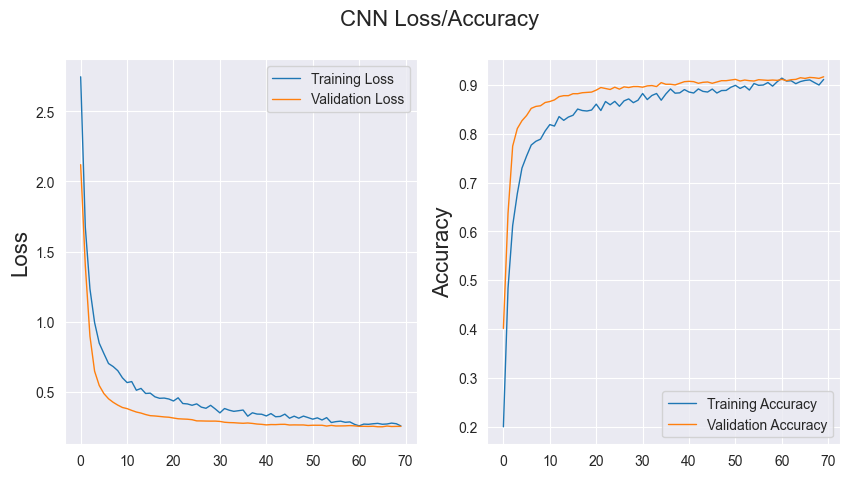

In [38]:
cnn_45 = CNN(base_model='InceptionResNetV2', model_name='InceptionResNetV2_18')

cnn_45.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_45.add(tf.keras.layers.Dropout(0.1))
cnn_45.add(tf.keras.layers.BatchNormalization())
cnn_45.add(tf.keras.layers.Dense(1024, activation='relu'))
cnn_45.add(tf.keras.layers.Dropout(0.1))
cnn_45.add(tf.keras.layers.BatchNormalization())
cnn_45.add(tf.keras.layers.Dense(15, activation='softmax'))

cnn_45.train(training_dir, validation_dir, epochs=70, early_stopping_patience=15, learning_rate=0.00001)
cnn_45.save()

In [39]:
cnn_45.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 127s 42ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            110.0    0.0     0.0      0.0         0.0          0.0      0.0          6.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  256.0     1.0      0.0         0.0          0.0      0.0          0.0       0.0     0.0           2.0    0.0     0.0     0.0            1.0
Forest               0.0    0.0   210.0      0.0         0.0          0.0      0.0          0.0       6.0     0.0          12.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    153.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     7.0     0.0       

In [41]:
cnn_45.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 62s 42ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             85.0    0.0     0.0      0.0         0.0          0.0      0.0         15.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0   95.0     0.0      2.0         1.0          0.0      0.0          0.0       1.0     0.0           1.0    0.0     0.0     0.0            0.0
Forest               0.0    2.0    88.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    1.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     97.0         0.0          0.0      0.0          0.0       0.0     0.0           0.0    0.0     3.0     0.0      